In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [3]:
def names(Name,title,size):
    namevalues = list(map(str, data[Name].value_counts().keys().tolist()))
    namecounts = list(map(int, data[Name].value_counts().tolist()))
    crimename = pd.DataFrame({'Type':namevalues,'repeat':namecounts})
    namebar = (crimename).sort_values(['repeat'])
    ax = namebar.plot(x = 'Type', y = 'repeat', kind = 'barh', figsize = size,title = title,legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+100, i.get_y()+.19,str(i.get_width()))

# Count of crime based on name

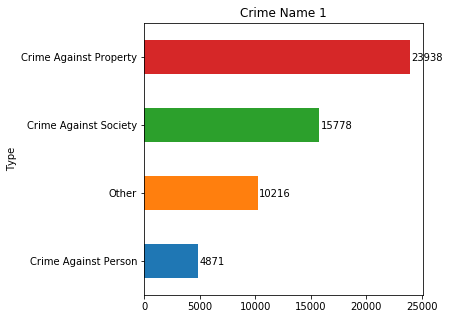

In [4]:
names("Crime Name1", "Crime Name 1",(5,5))

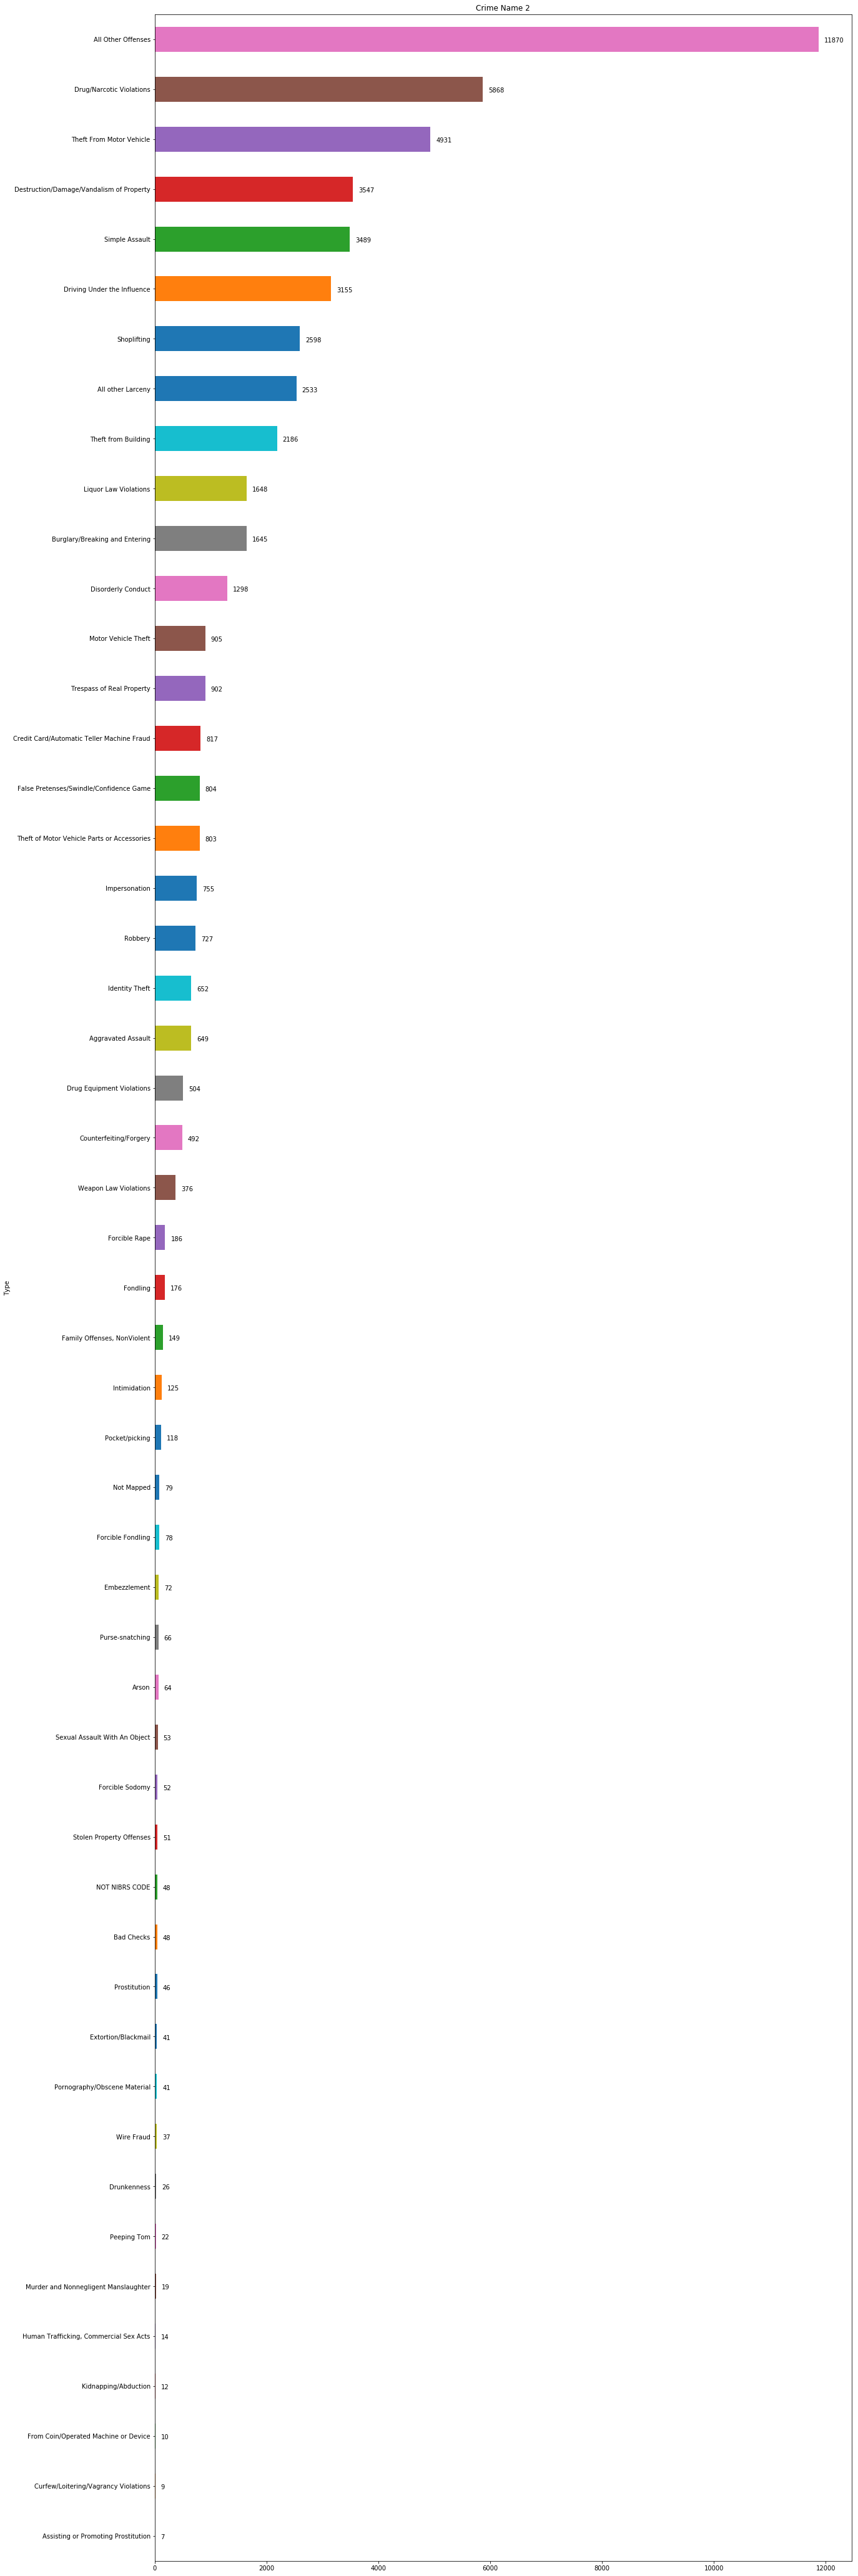

In [5]:
names("Crime Name2", "Crime Name 2",(20,75))

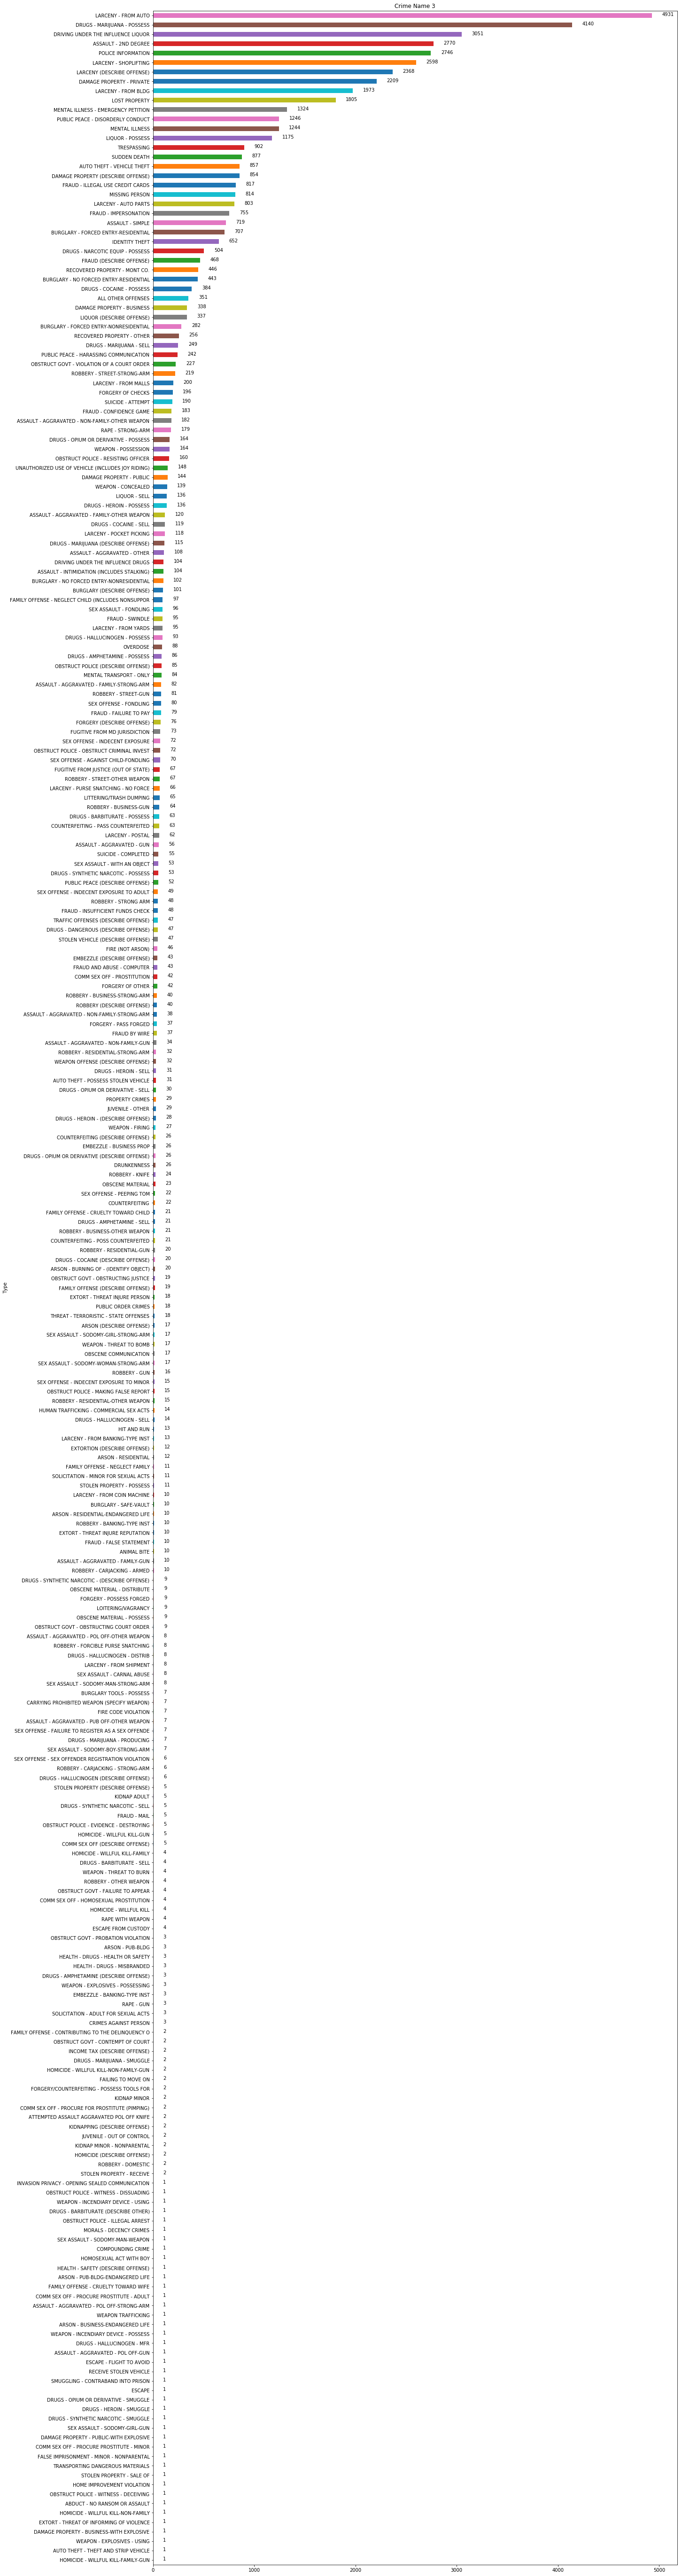

In [6]:
names("Crime Name3", "Crime Name 3",(20,100))

In [7]:
def weekandcount(data,w,title):
    bruh = [[0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0]]
    for index, row in data.iterrows():
        if (row['Start Day'] == "Monday"):
            i = 6
        elif (row['Start Day'] == "Tuesday"):
            i = 5
        elif (row['Start Day'] == "Wednesday"):
            i = 4
        elif (row['Start Day'] == "Thursday"):
            i = 3
        elif (row['Start Day'] == "Friday"):
            i = 2
        elif (row['Start Day'] == "Saturday"):
            i = 1
        elif (row['Start Day'] == "Sunday"):
            i = 0
        if (row['Crime Name1']) == "Crime Against Society":
            bruh[1][i] +=1
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh[2][i] +=1
        elif(row['Crime Name1']) == "Other":
            bruh[3][i] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[0][i] +=1
    dayvalues = list(map(str, data['Start Day'].value_counts().keys().tolist()))
    daycounts = list(map(int, data['Start Day'].value_counts().tolist()))
    daysofweek = pd.DataFrame({'day':dayvalues,'count':daycounts})
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    order.reverse()
    mapping = {day: i for i, day in enumerate(order)}
    key = daysofweek['day'].map(mapping)
    daybar = daysofweek.iloc[key.argsort()]
    daybar["CAProp"] = bruh[0]
    daybar["CASoc"] = bruh[1]
    daybar["CAPer"] = bruh[2]
    daybar["Other"] = bruh[3]
    ax = daybar.plot(x = 'day', y = 'count', kind = 'barh', figsize = (20,20),title = title, legend = False)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = daybar["count"]
    daybar = daybar.drop(["count"],axis = 1)
    ax = daybar.plot.barh(figsize = (20,20),stacked = True,x = 'day')
    daybar["count"] = ugh
    #for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
    #    ax.text(i.get_width()+15000, i.get_y()+.19,str(i.get_width()))

# Count of crime based on weekday

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

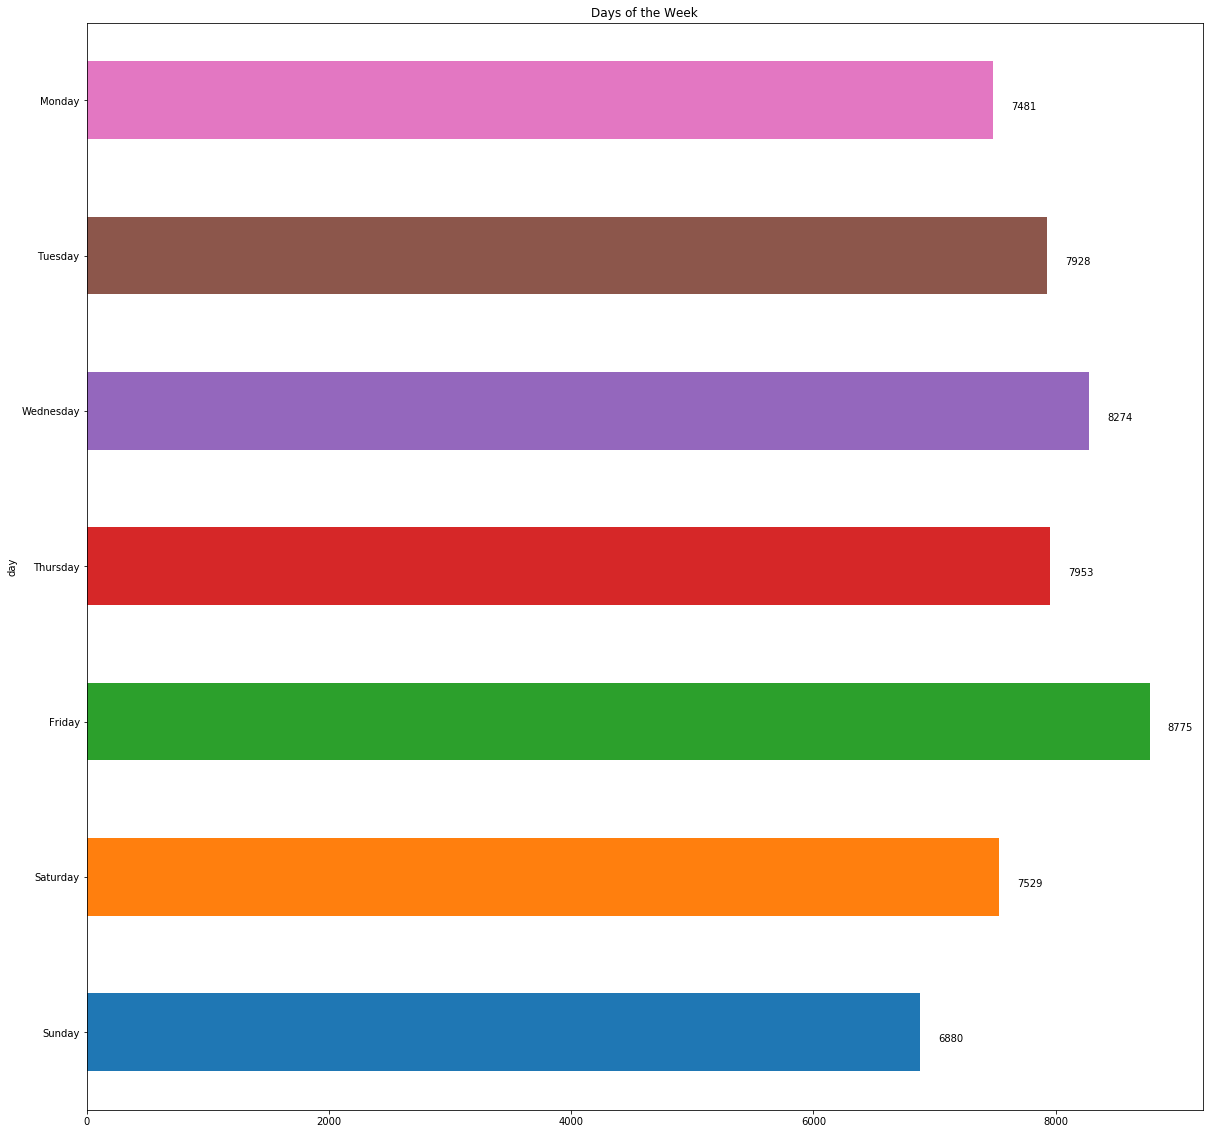

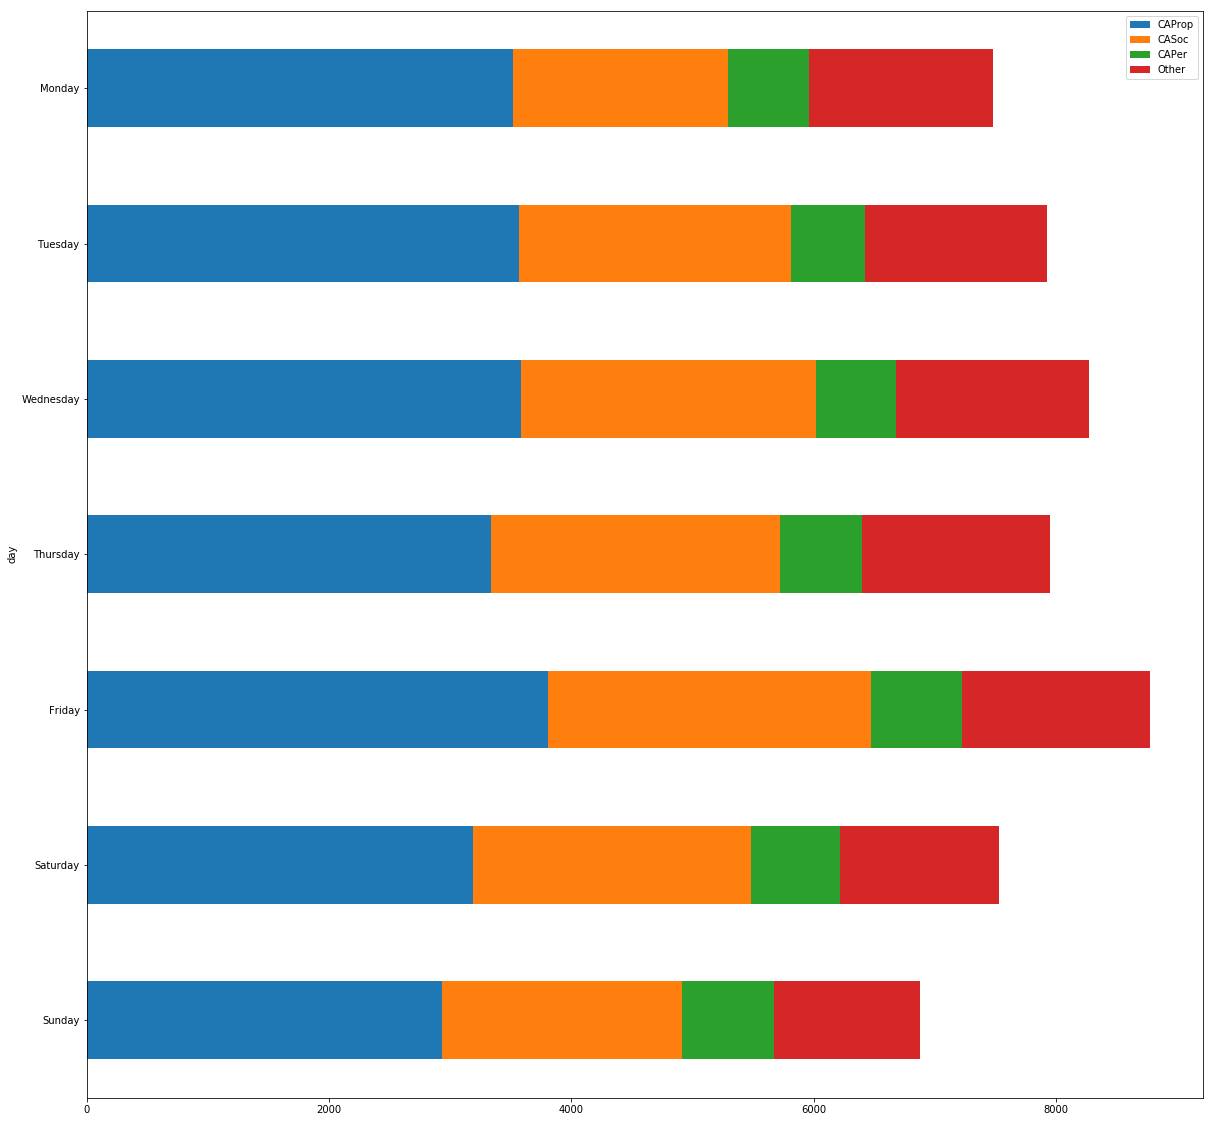

In [8]:
weekandcount(data,150,"Days of the Week")

In [3]:
def dayandcount(data,w):
    datevalues = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    datecounts = list(map(int, data['Start Date'].value_counts().tolist()))
    ughh = []
    ughhh = []
    date = pd.DataFrame({'Date':datevalues,'Crime Frequency':datecounts})
    ugh = list(map(str,date['Date']))
    for i in range(0,len(date)):
        ughh.append(ugh[i][:2])
        ughhh.append(ugh[i][3:])
    date['month'] = ughh
    date['day'] = ughhh
    date = (date).sort_values(['Date']).reset_index()
    bruh = [0]*365
    bruh1 = [0]*365
    bruh2 = [0]*365
    bruh3 = [0]*365
    ugh = []
    datevalues.sort()
    for index, row in data.iterrows():  
        if (row['Crime Name1']) == "Crime Against Society":
            bruh1[datevalues.index(row['Start Date'])] +=1
            #print(row['Start Date'],datevalues.index(row['Start Date']),row["Crime Name1"])
            #print(bruh1)
        elif (row['Crime Name1']) == "Crime Against Person":
            bruh2[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Other":
            bruh3[datevalues.index(row['Start Date'])] +=1
        elif(row['Crime Name1']) == "Crime Against Property":
            bruh[datevalues.index(row['Start Date'])] +=1
    date["Crime Against Property"] = bruh
    date["Crime Against Society"] = bruh1
    date["Crime Against Person"] = bruh2
    date["Other"] = bruh3
    #date = date.drop([0],axis = 0)
    date = date.iloc[::-1]
    ax = date.plot(x = 'Date', y = 'Crime Frequency', kind = 'barh', figsize = (20,500),title = "Date", legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+w, i.get_y()+.19,str(i.get_width()))
    ugh = date["Crime Frequency"]
    date = date.drop(["Crime Frequency"],axis = 1)
    ax = date.plot.barh(figsize = (20,500),stacked = True,x = 'Date')
    date["Crime Frequency"] = ugh
    return date

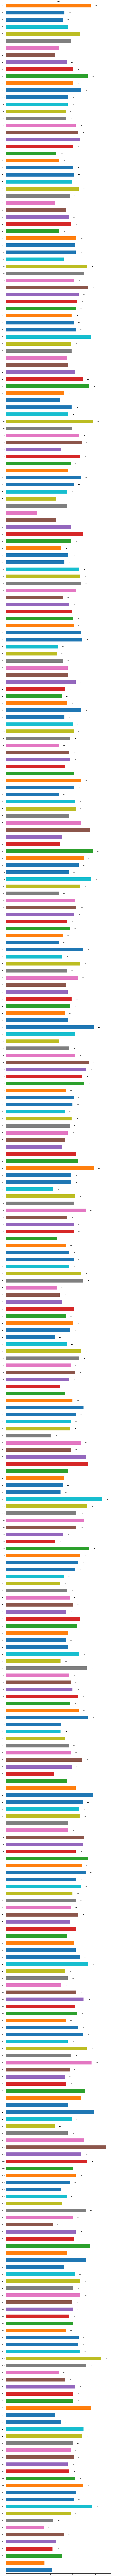

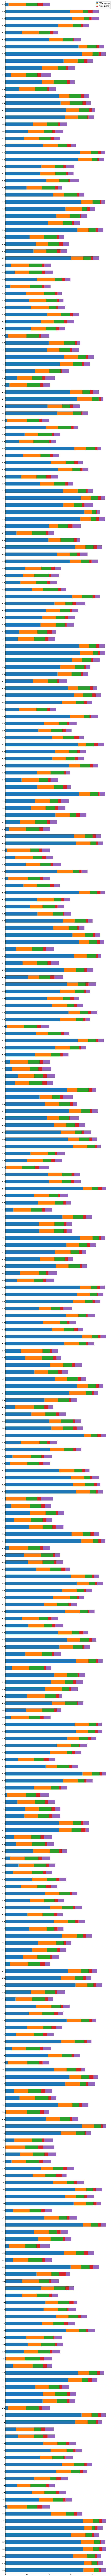

In [4]:
date = dayandcount(data,10)

In [11]:
def yeartomonth(date):
    jan = date.loc[date['month'] == "01"]
    feb = date.loc[date['month'] == "02"]
    mar = date.loc[date['month'] == "03"]
    apr = date.loc[date['month'] == "04"]
    may = date.loc[date['month'] == "05"]
    jun = date.loc[date['month'] == "06"]
    jul = date.loc[date['month'] == "07"]
    aug = date.loc[date['month'] == "08"]
    sep = date.loc[date['month'] == "09"]
    octo = date.loc[date['month'] == "10"]
    nov = date.loc[date['month'] == "11"]
    dec = date.loc[date['month'] == "12"]
    return jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec

In [12]:
jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec = yeartomonth(date)

In [13]:
def monthh(mon,title):
    daycount = [0]*31
    cap = [0]*31
    cas = [0]*31
    capp = [0]*31
    oth = [0]*31
    mon = mon.sort_values(['Date'])
    i = 0
    for index, row in mon.iterrows():
        daycount[i] = row['Crime Frequency']
        cap[i] = row['Crime Against Property']
        cas[i] = row['Crime Against Society']
        capp[i] = row['Crime Against Person']
        oth[i] = row['Other']
        i = i + 1
    mon = mon.iloc[::-1]
    ax = mon.plot(x = 'Date', y = 'Crime Frequency', kind = 'barh', figsize = (20,20),title = title, legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.19,str(i.get_width()))
    ugh = mon["Crime Frequency"]
    mon = mon.drop(["Crime Frequency"],axis = 1)
    ax = mon.plot.barh(figsize = (20,20),stacked = True,x = 'Date',title = title)
    mon["Crime Frequency"] = ugh

In [14]:
def monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec):
    monthh(jan,"January")
    monthh(feb,"February")
    monthh(mar,"March")
    monthh(apr,"April")
    monthh(may,"May")
    monthh(jun,"June")
    monthh(jul,"July")
    monthh(aug,"August")
    monthh(sep,"September")
    monthh(octo,"October")
    monthh(nov,"November")
    monthh(dec,"December")
    ugh =[]
    ugh.append(jan['Crime Frequency'].sum())
    ugh.append(feb['Crime Frequency'].sum())
    ugh.append(mar['Crime Frequency'].sum())
    ugh.append(apr['Crime Frequency'].sum())
    ugh.append(may['Crime Frequency'].sum())
    ugh.append(jun['Crime Frequency'].sum())
    ugh.append(jul['Crime Frequency'].sum())
    ugh.append(aug['Crime Frequency'].sum())
    ugh.append(sep['Crime Frequency'].sum())
    ugh.append(octo['Crime Frequency'].sum())
    ugh.append(nov['Crime Frequency'].sum())
    ugh.append(dec['Crime Frequency'].sum())

    ughh =[]
    ughh.append(jan['Crime Against Property'].sum())
    ughh.append(feb['Crime Against Property'].sum())
    ughh.append(mar['Crime Against Property'].sum())
    ughh.append(apr['Crime Against Property'].sum())
    ughh.append(may['Crime Against Property'].sum())
    ughh.append(jun['Crime Against Property'].sum())
    ughh.append(jul['Crime Against Property'].sum())
    ughh.append(aug['Crime Against Property'].sum())
    ughh.append(sep['Crime Against Property'].sum())
    ughh.append(octo['Crime Against Property'].sum())
    ughh.append(nov['Crime Against Property'].sum())
    ughh.append(dec['Crime Against Property'].sum())

    ughhh =[]
    ughhh.append(jan['Crime Against Society'].sum())
    ughhh.append(feb['Crime Against Society'].sum())
    ughhh.append(mar['Crime Against Society'].sum())
    ughhh.append(apr['Crime Against Society'].sum())
    ughhh.append(may['Crime Against Society'].sum())
    ughhh.append(jun['Crime Against Society'].sum())
    ughhh.append(jul['Crime Against Society'].sum())
    ughhh.append(aug['Crime Against Society'].sum())
    ughhh.append(sep['Crime Against Society'].sum())
    ughhh.append(octo['Crime Against Society'].sum())
    ughhh.append(nov['Crime Against Society'].sum())
    ughhh.append(dec['Crime Against Society'].sum())

    ughhhh =[]
    ughhhh.append(jan['Crime Against Person'].sum())
    ughhhh.append(feb['Crime Against Person'].sum())
    ughhhh.append(mar['Crime Against Person'].sum())
    ughhhh.append(apr['Crime Against Person'].sum())
    ughhhh.append(may['Crime Against Person'].sum())
    ughhhh.append(jun['Crime Against Person'].sum())
    ughhhh.append(jul['Crime Against Person'].sum())
    ughhhh.append(aug['Crime Against Person'].sum())
    ughhhh.append(sep['Crime Against Person'].sum())
    ughhhh.append(octo['Crime Against Person'].sum())
    ughhhh.append(nov['Crime Against Person'].sum())
    ughhhh.append(dec['Crime Against Person'].sum())

    ughhhhh =[]
    ughhhhh.append(jan['Other'].sum())
    ughhhhh.append(feb['Other'].sum())
    ughhhhh.append(mar['Other'].sum())
    ughhhhh.append(apr['Other'].sum())
    ughhhhh.append(may['Other'].sum())
    ughhhhh.append(jun['Other'].sum())
    ughhhhh.append(jul['Other'].sum())
    ughhhhh.append(aug['Other'].sum())
    ughhhhh.append(sep['Other'].sum())
    ughhhhh.append(octo['Other'].sum())
    ughhhhh.append(nov['Other'].sum())
    ughhhhh.append(dec['Other'].sum())
    
    month = pd.DataFrame({"months": ["Jan",'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 'Crime Frequency':ugh, "Crime Against Property":ughh, "Crime Against Society":ughhh,'Crime Against Person':ughhhh,'Other':ughhhh})
    ax = month.iloc[::-1].plot(x = 'months', y = 'Crime Frequency', kind = 'barh', figsize = (20,20),title = 'Months', legend = False, fontsize = 12)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+1, i.get_y()+.19,str(i.get_width()))
    ax = month.iloc[::-1].plot.barh(x = 'months', y = ["Crime Against Property", "Crime Against Society", "Crime Against Person", "Other"],figsize = (20,20),stacked = True,title = "Months")

# Crime by Date and Month

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


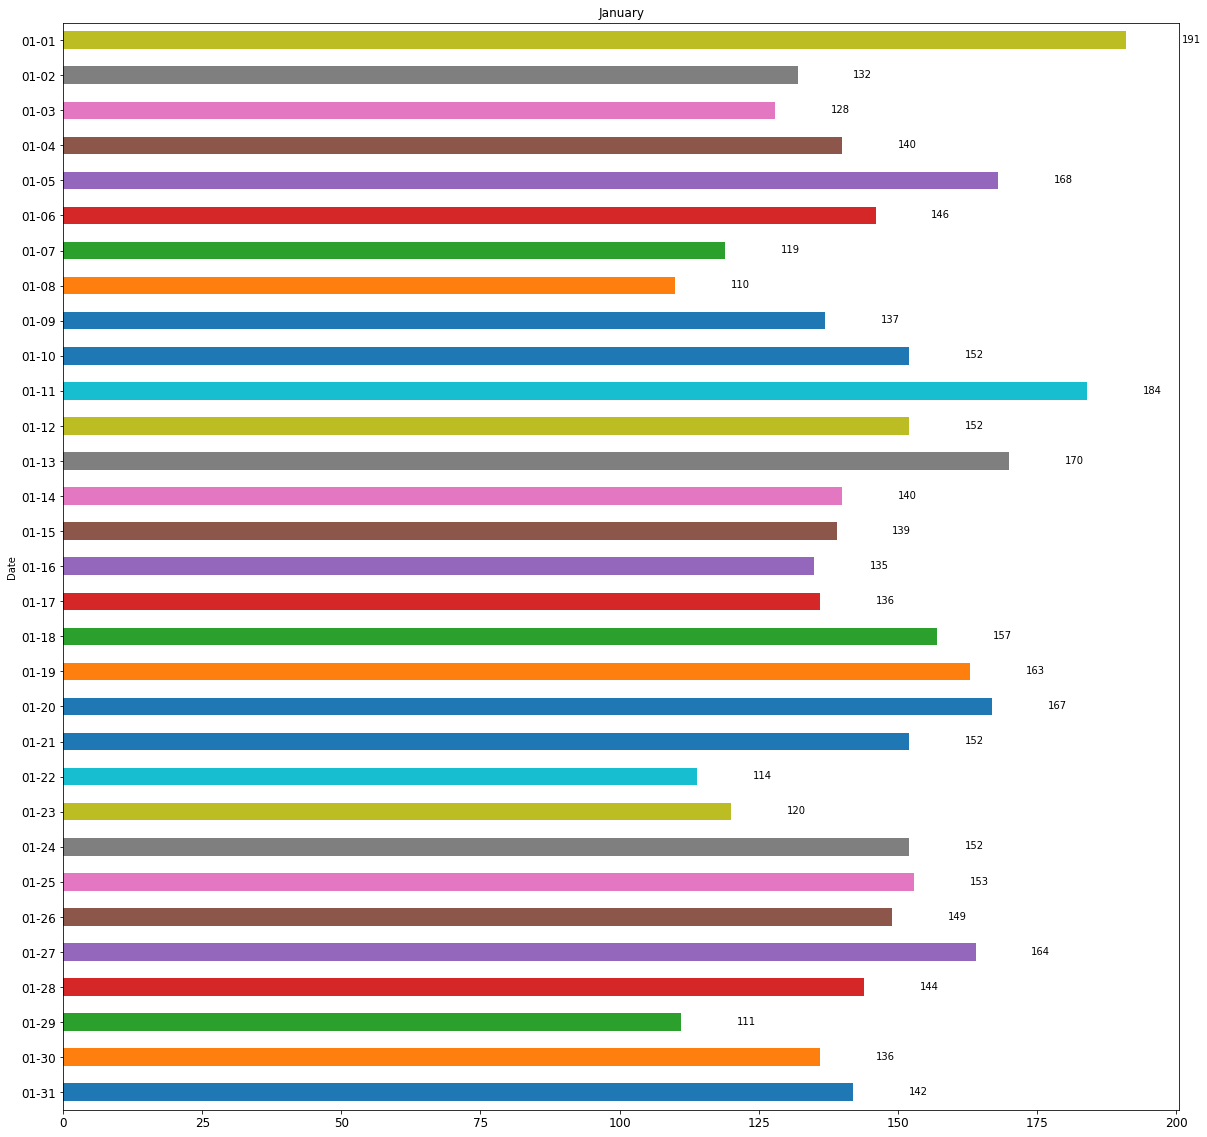

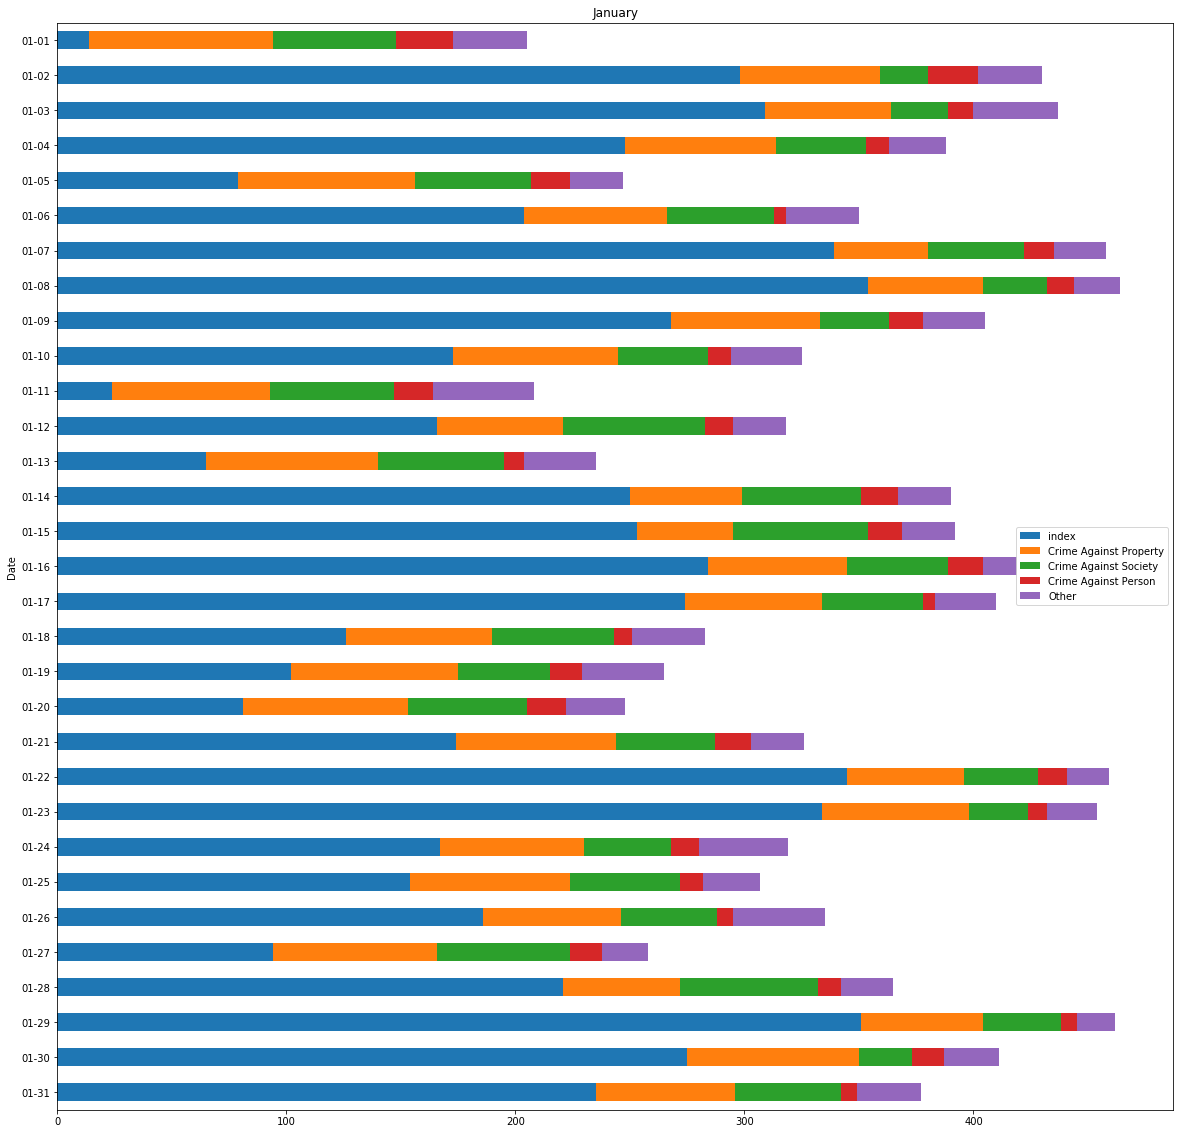

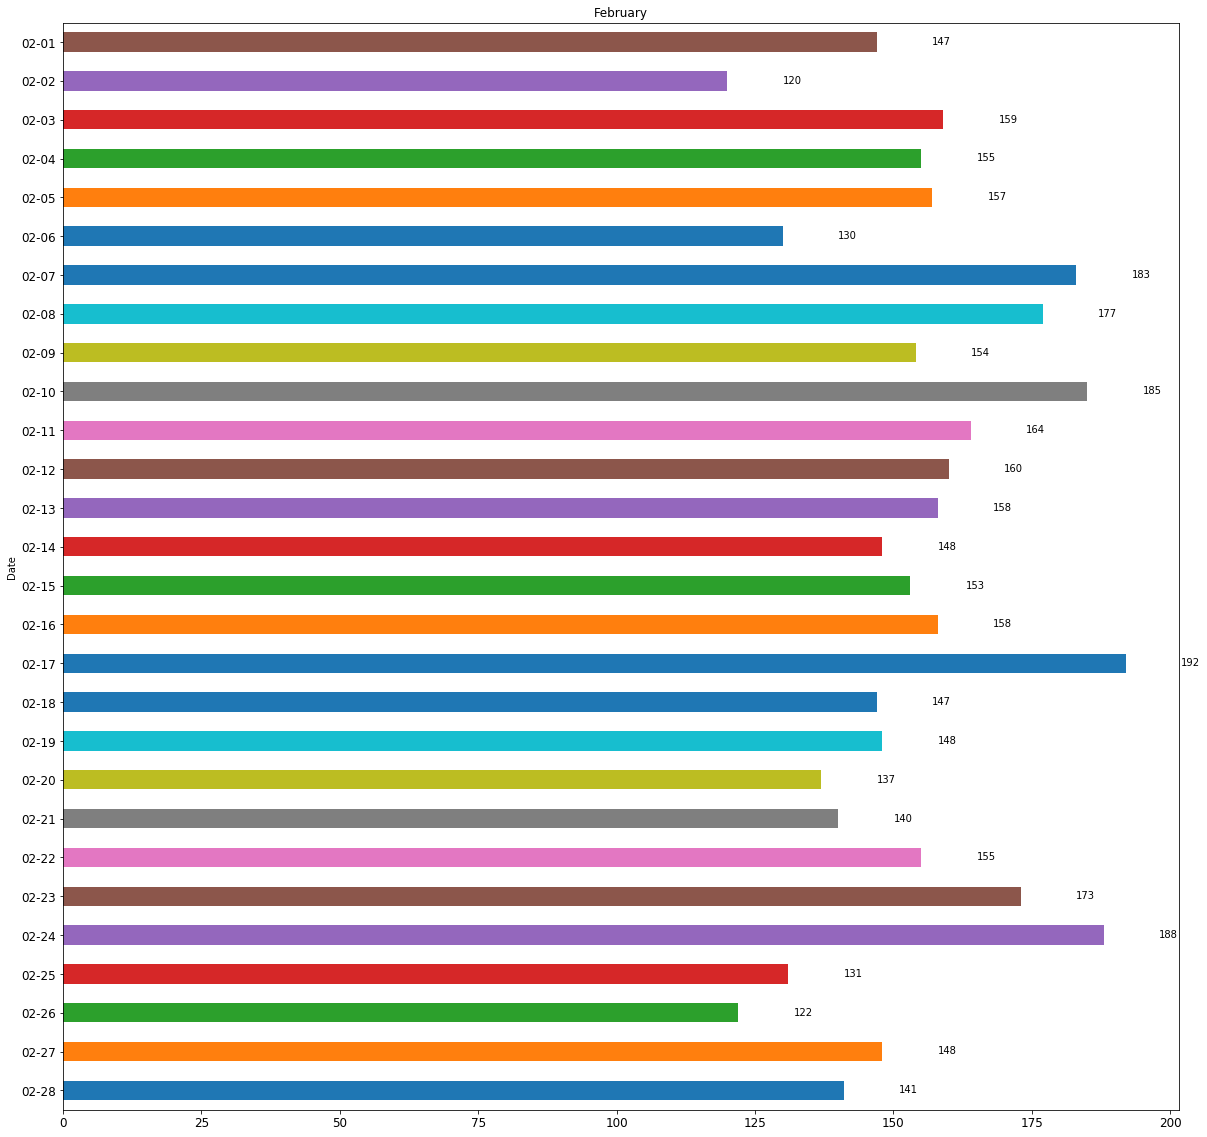

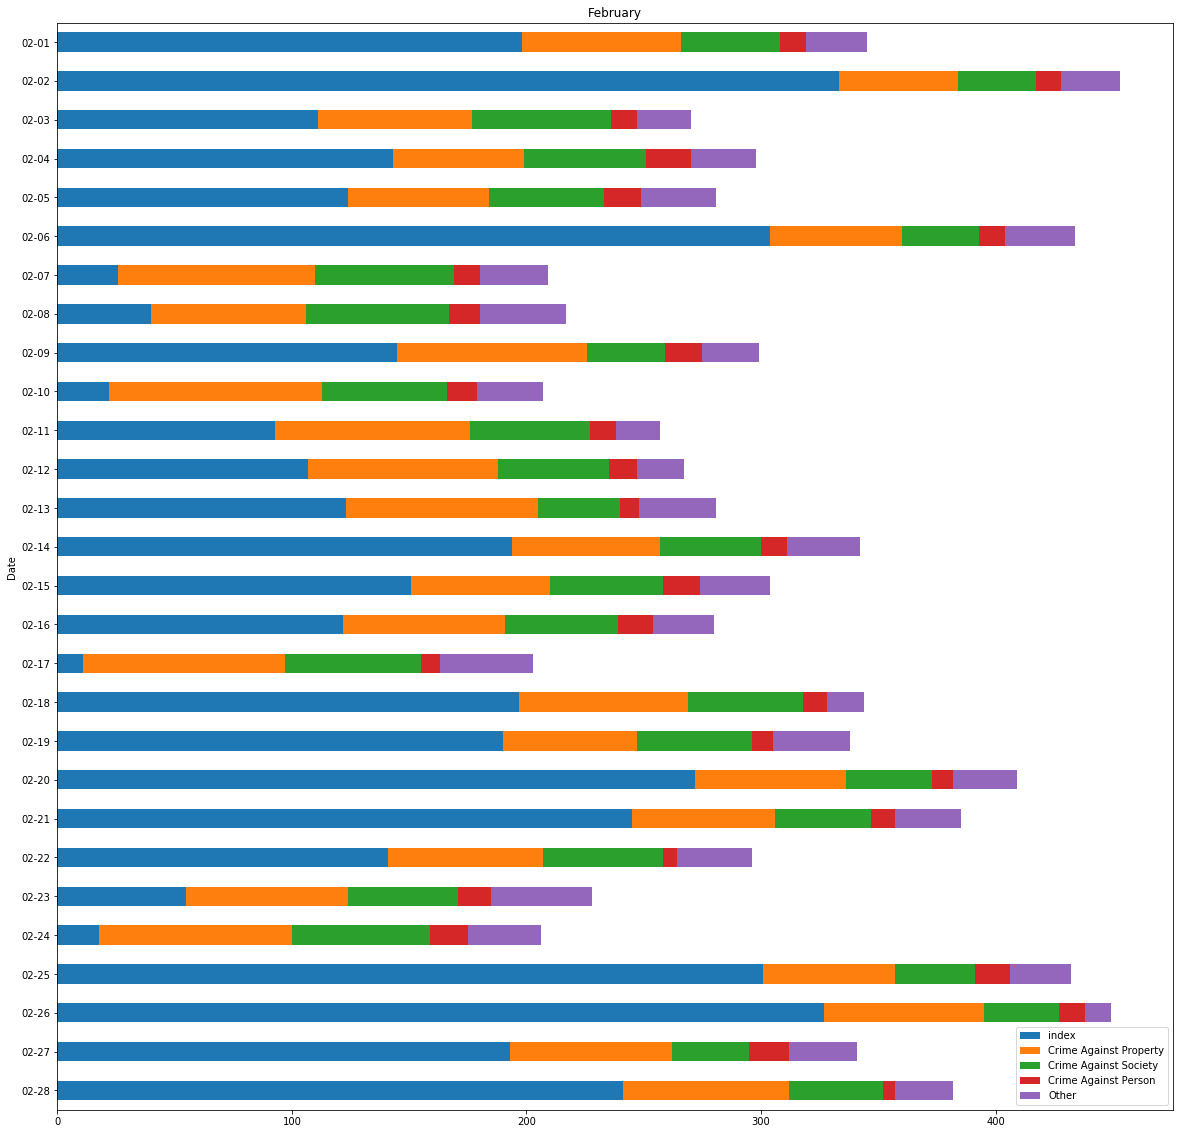

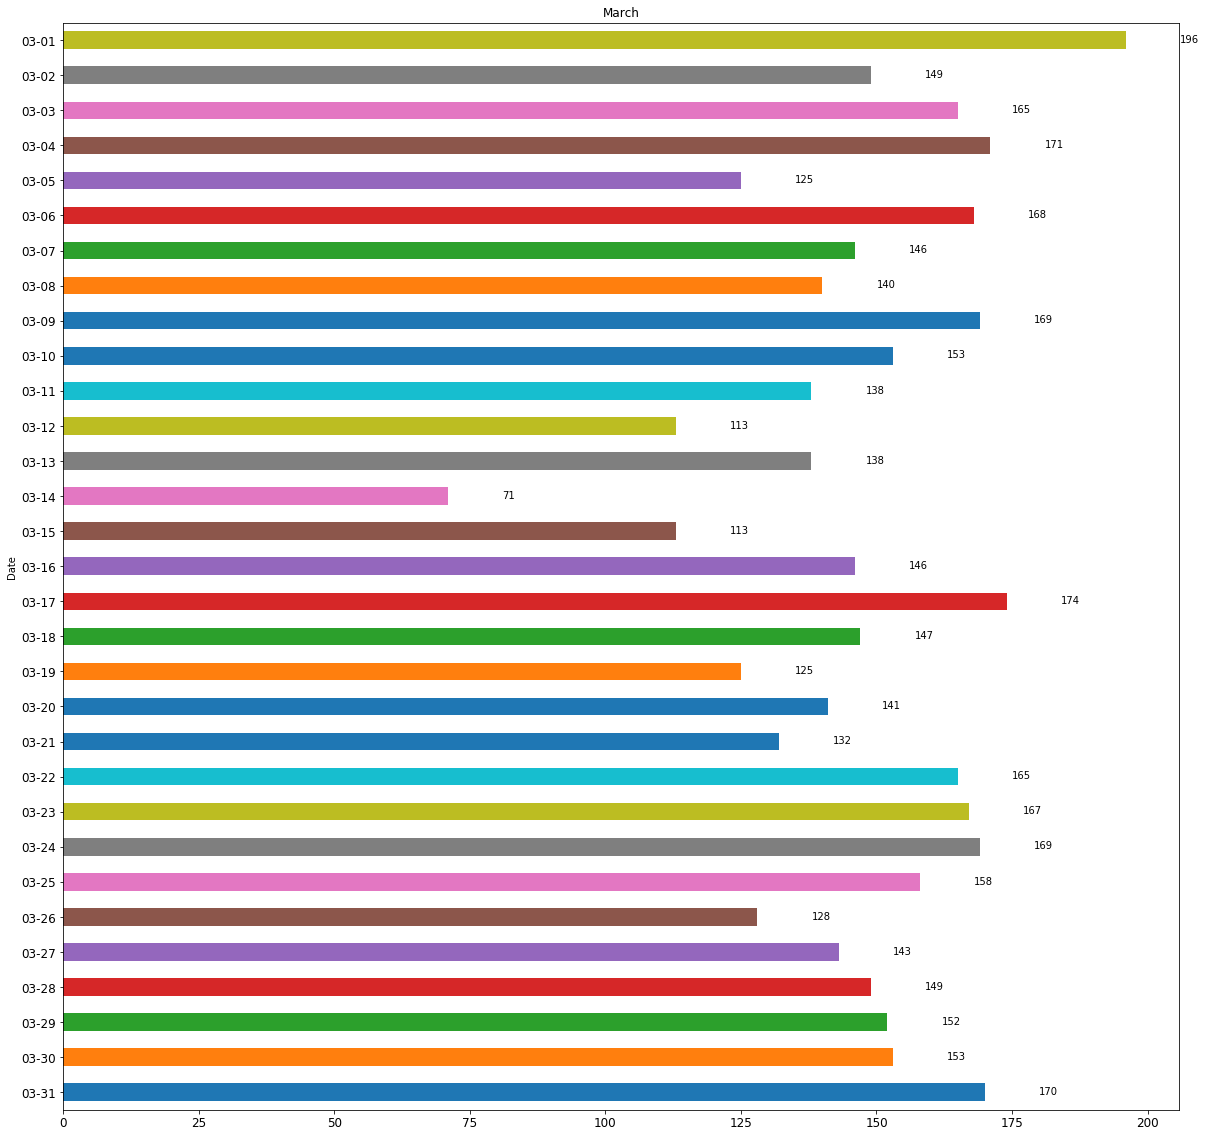

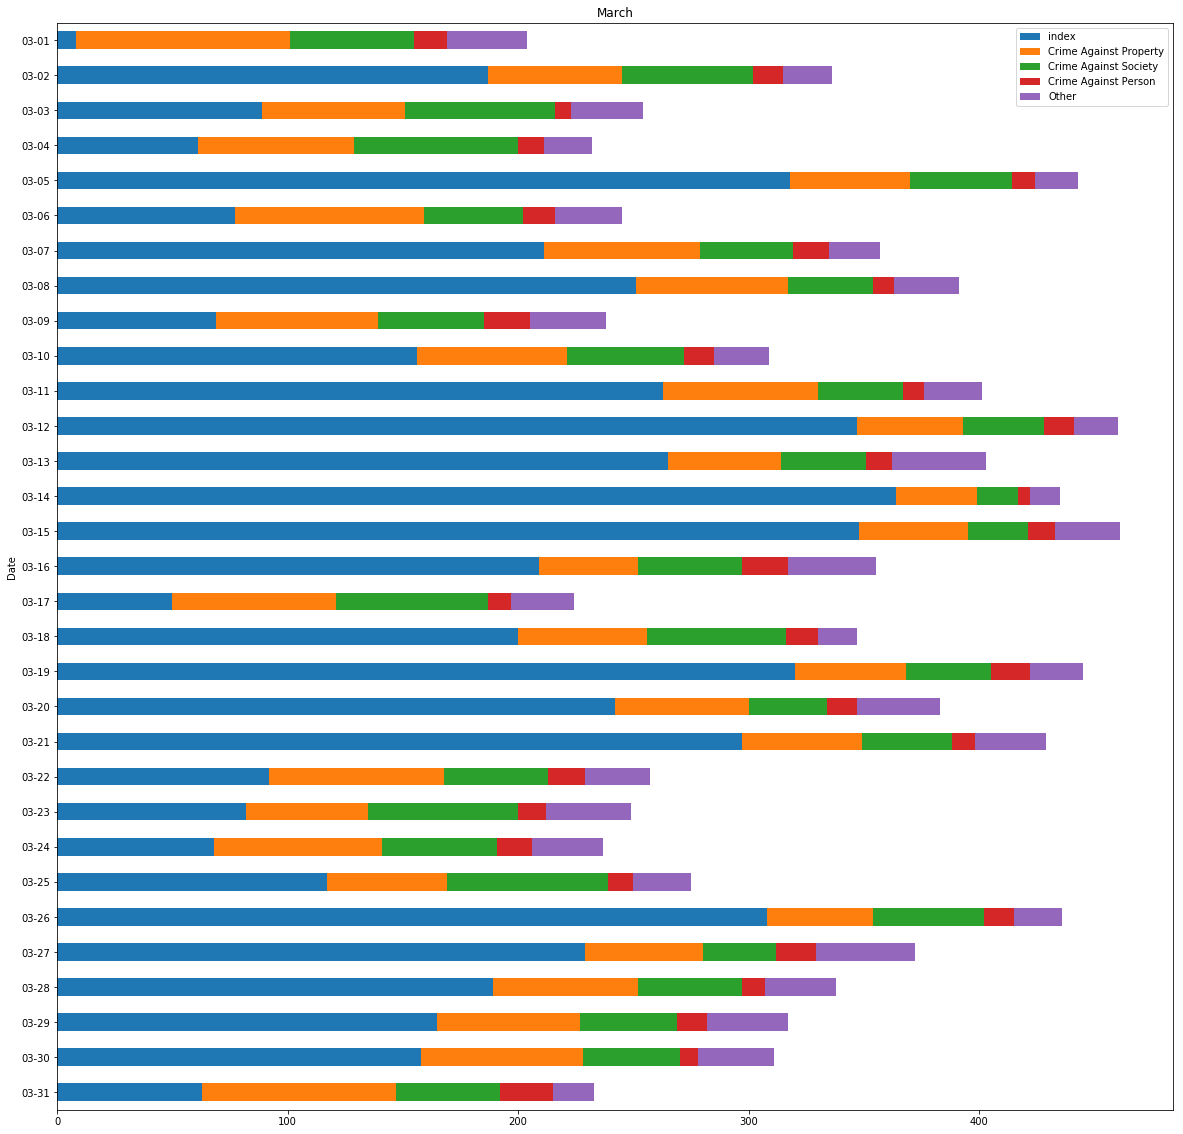

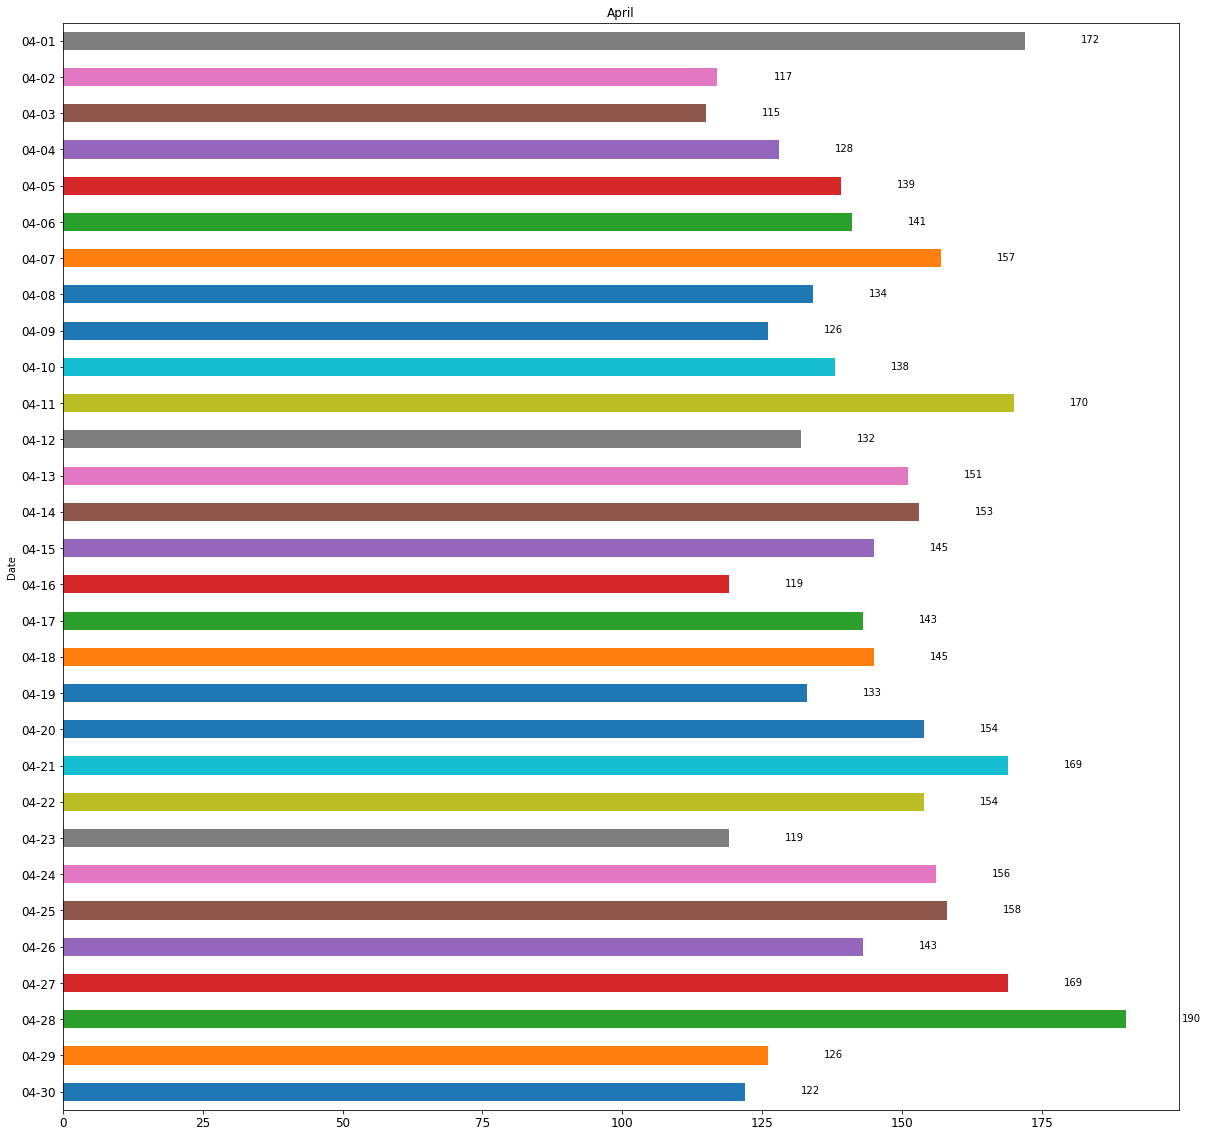

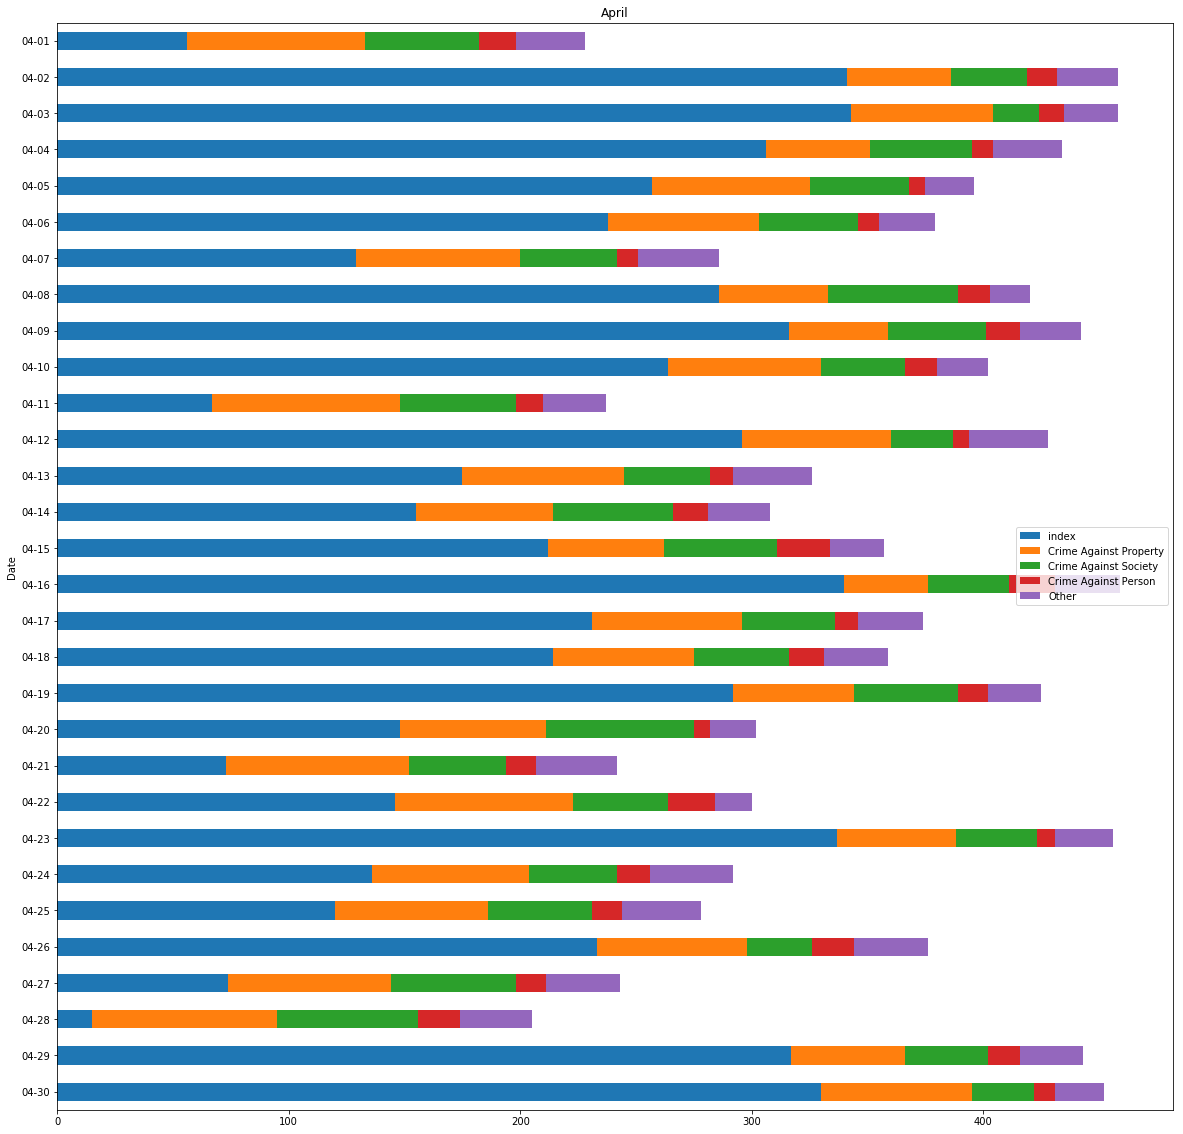

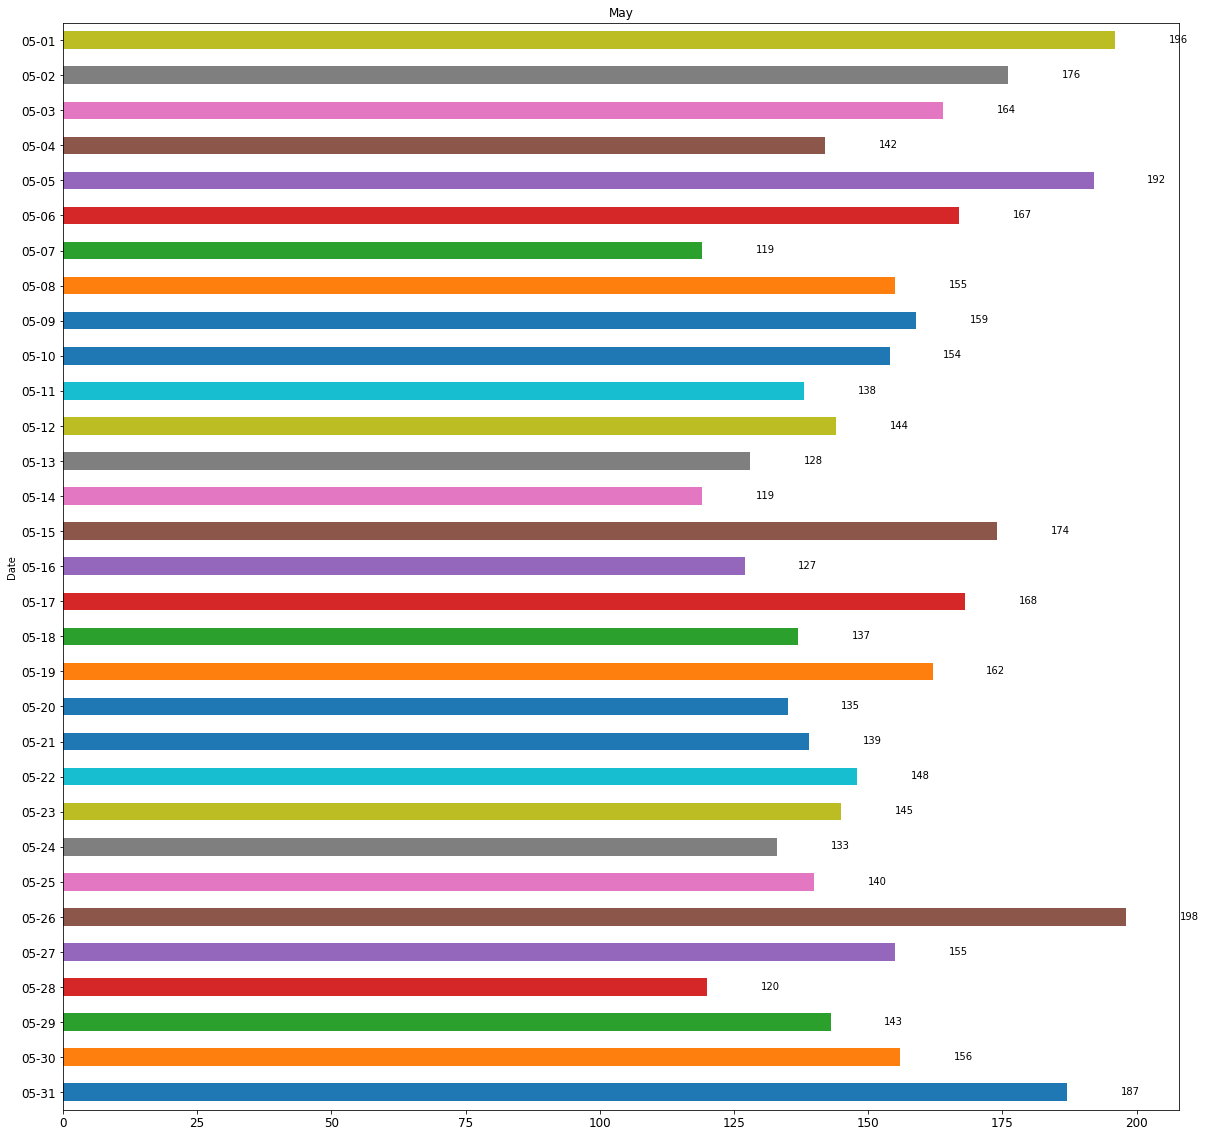

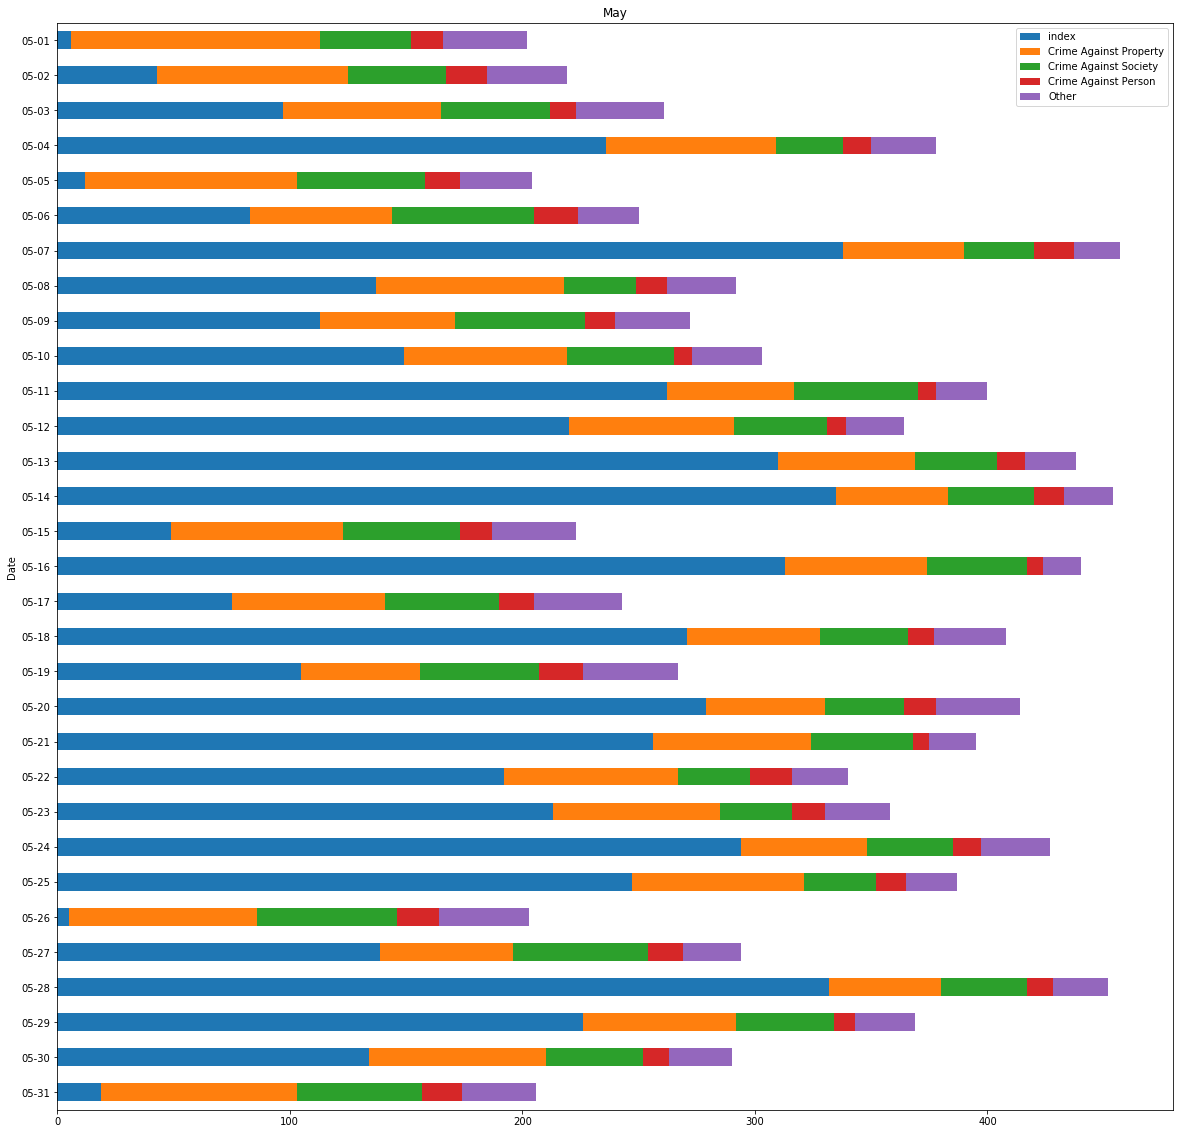

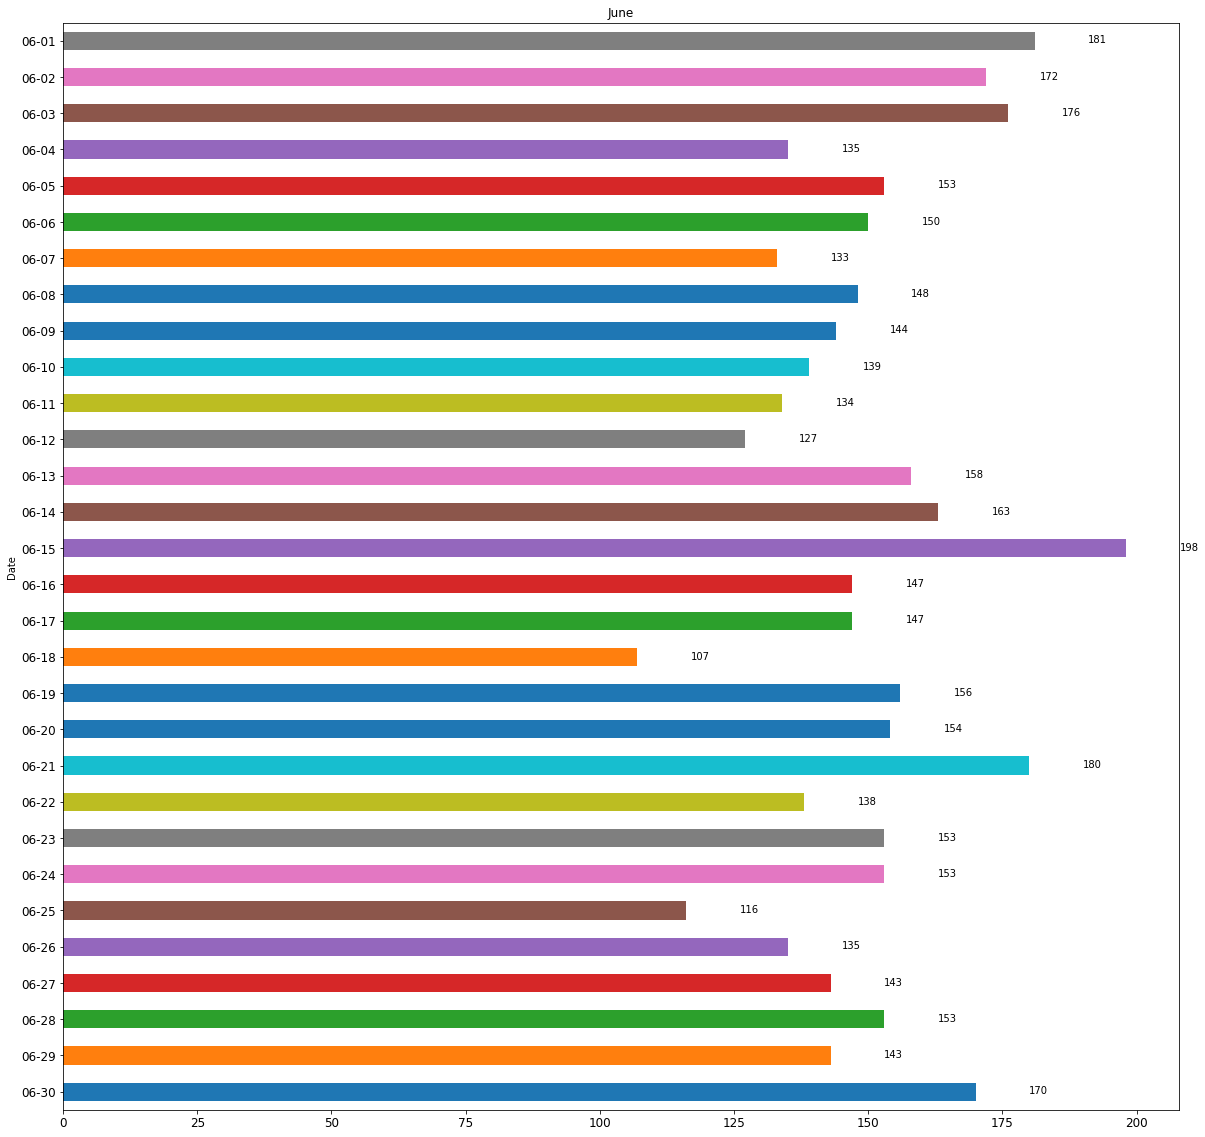

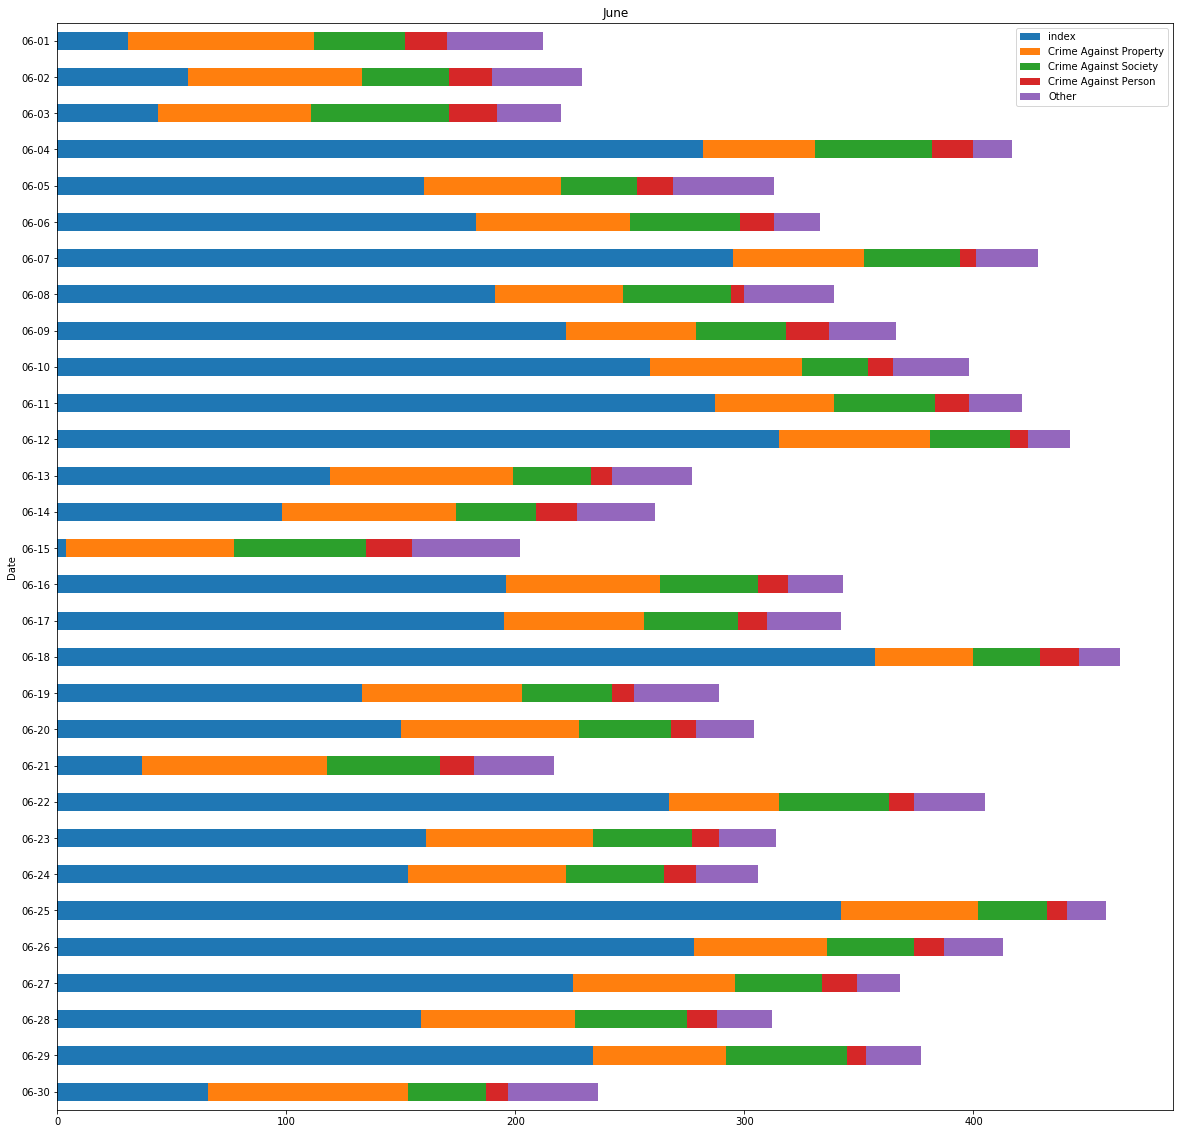

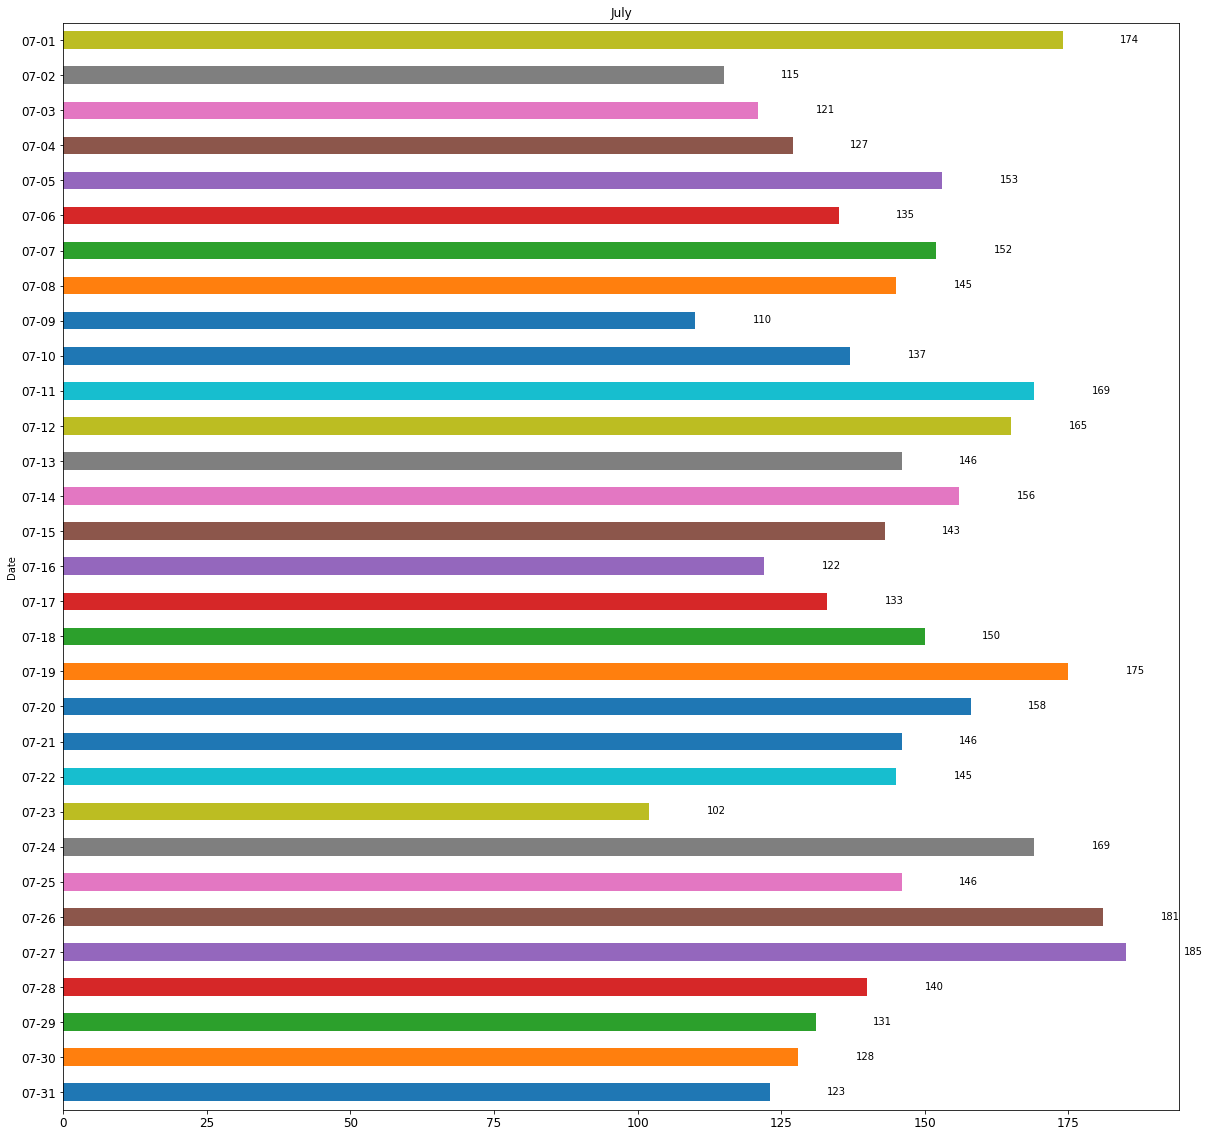

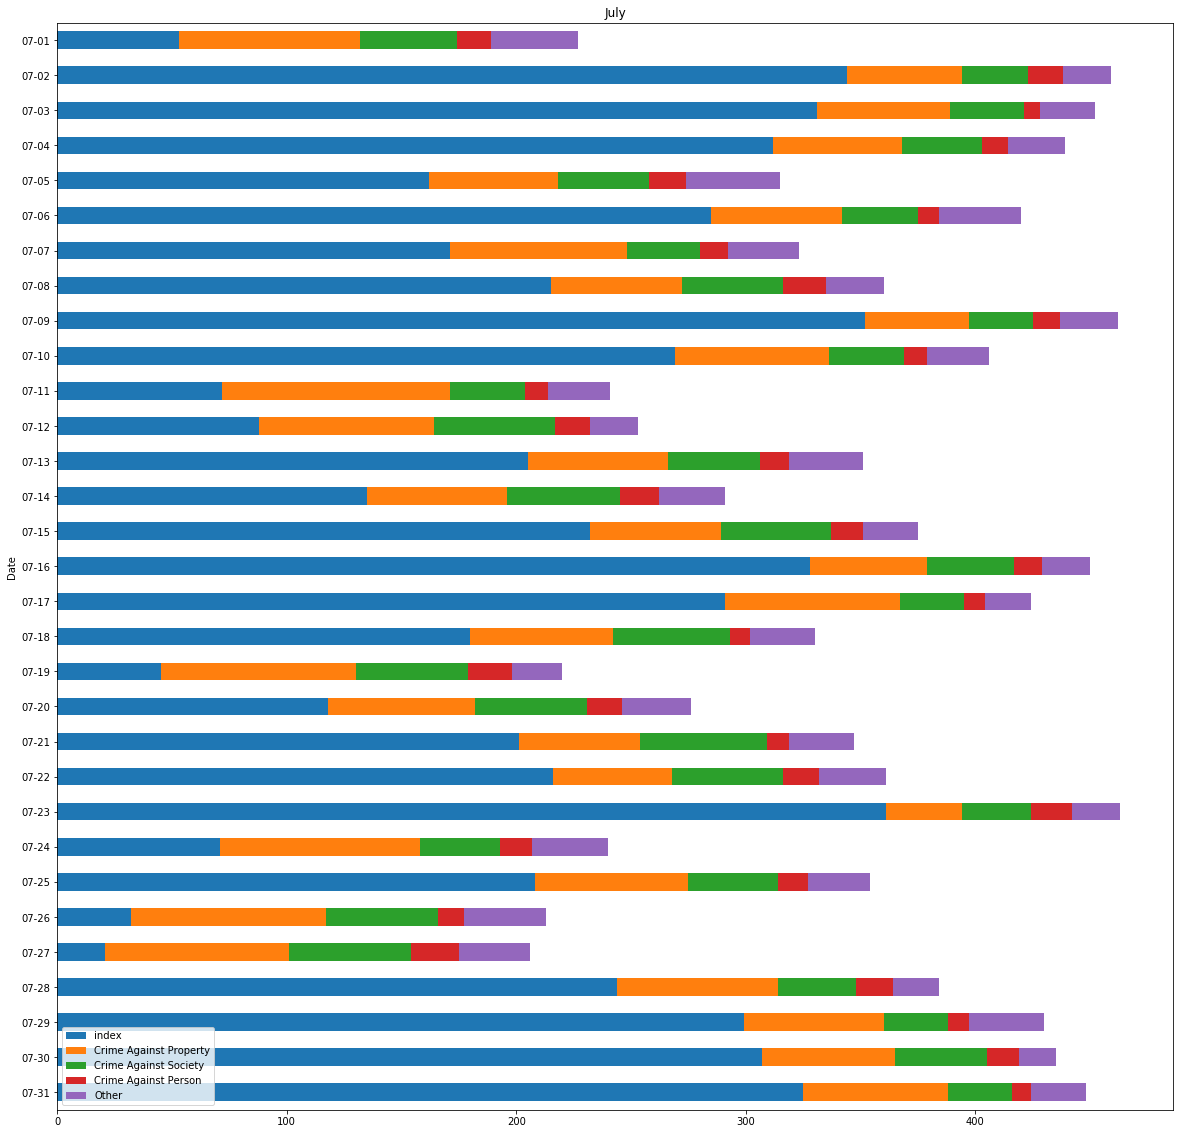

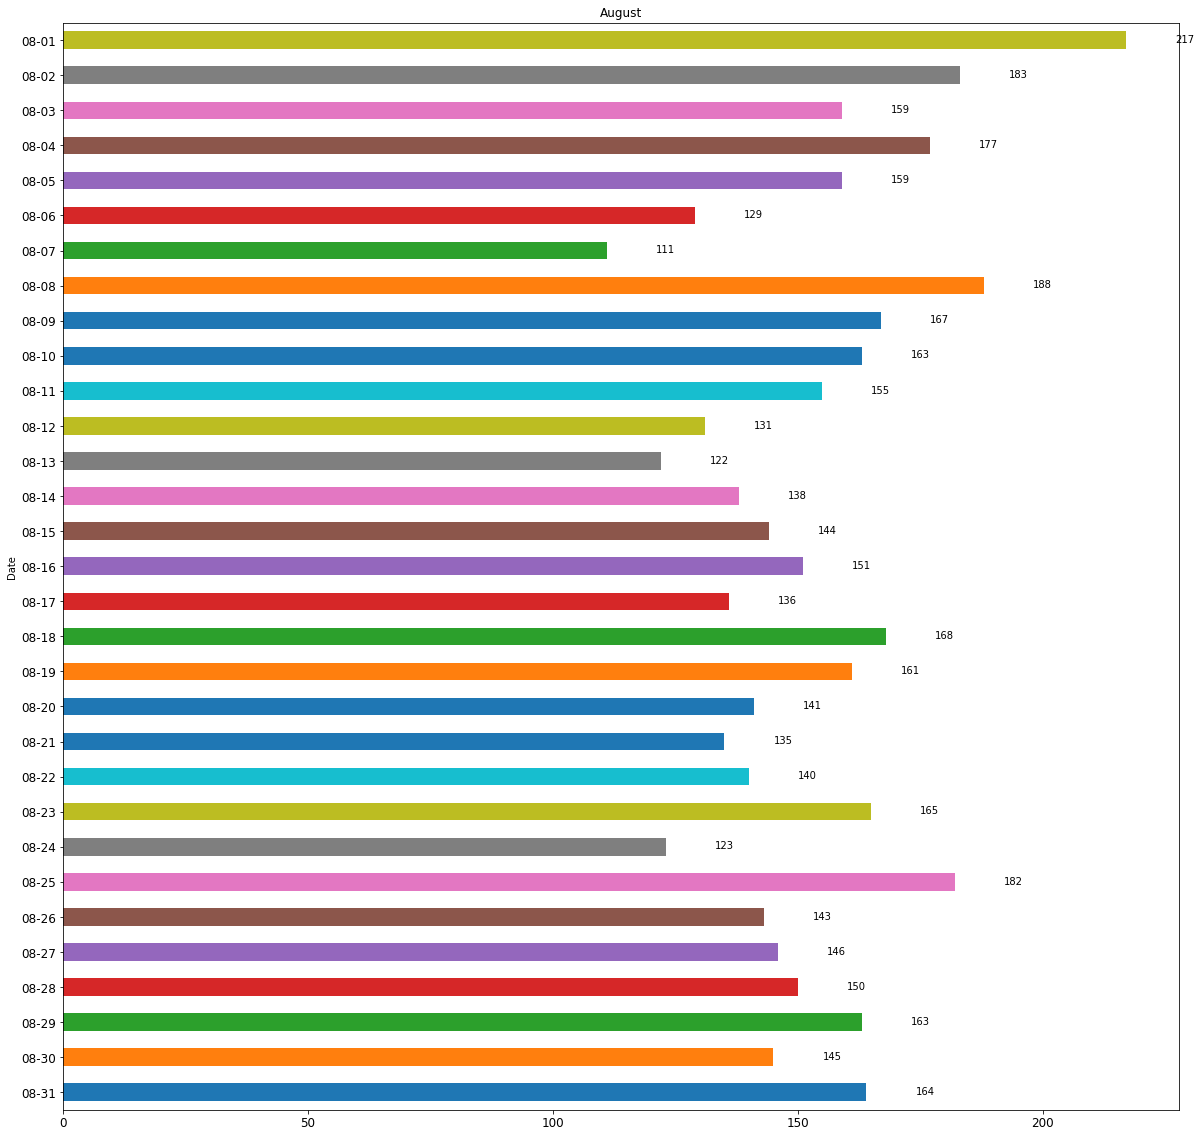

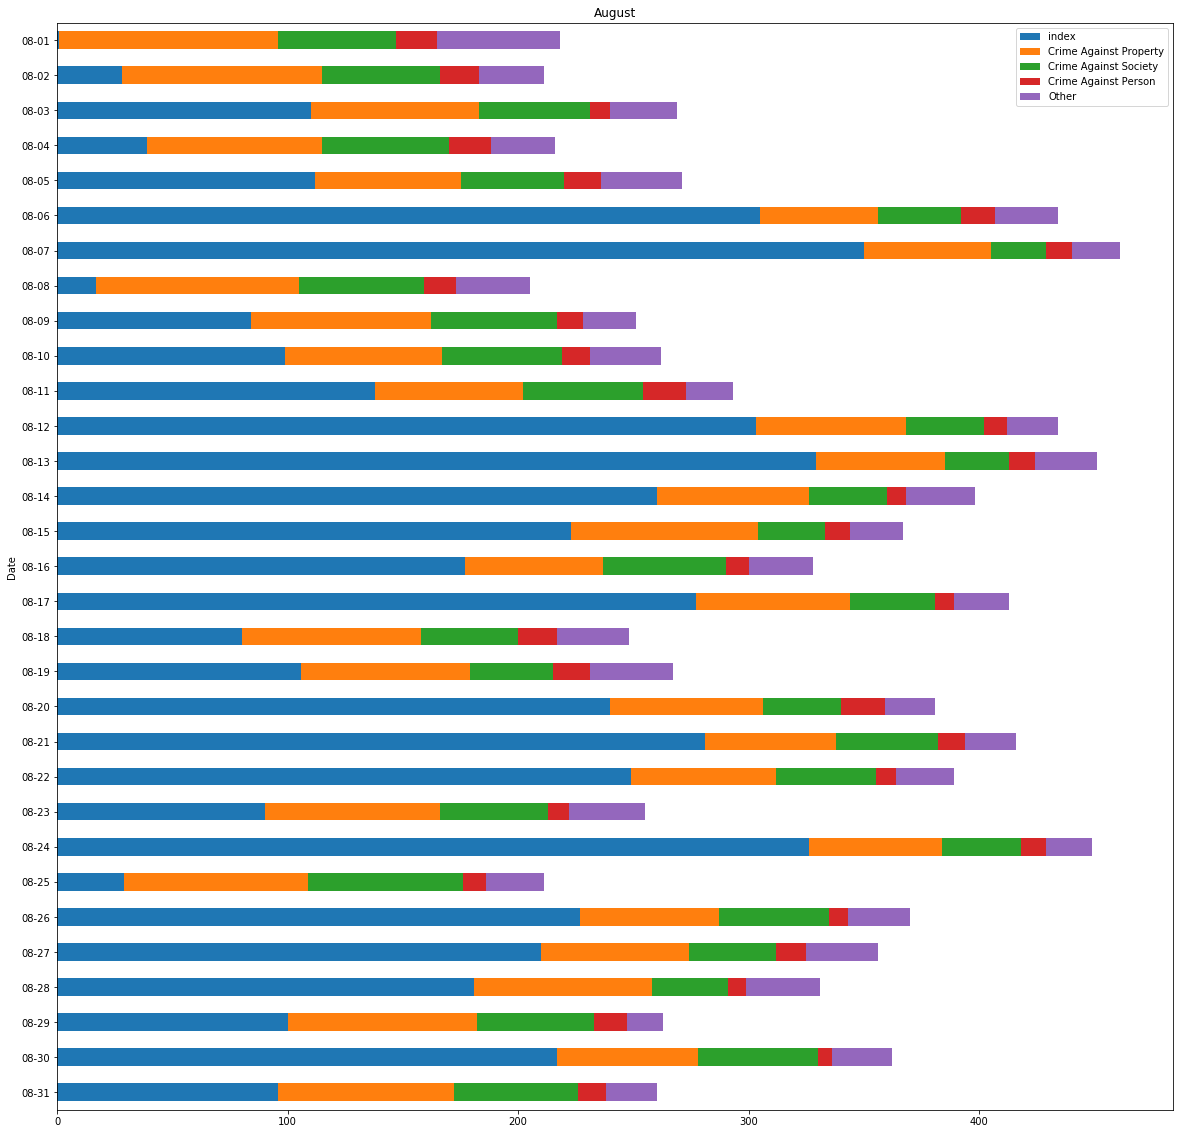

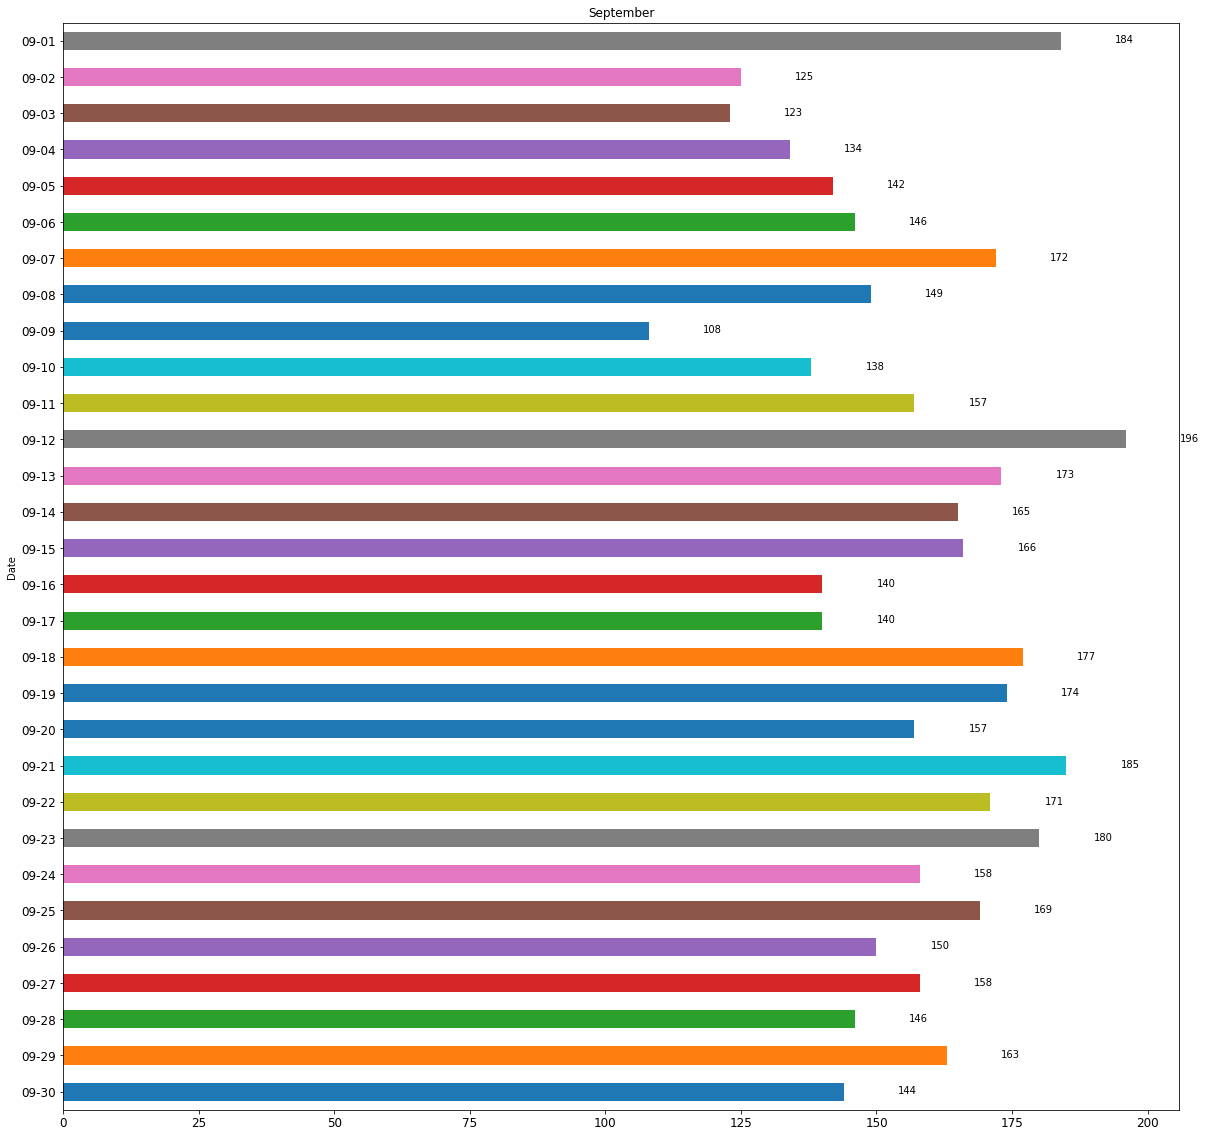

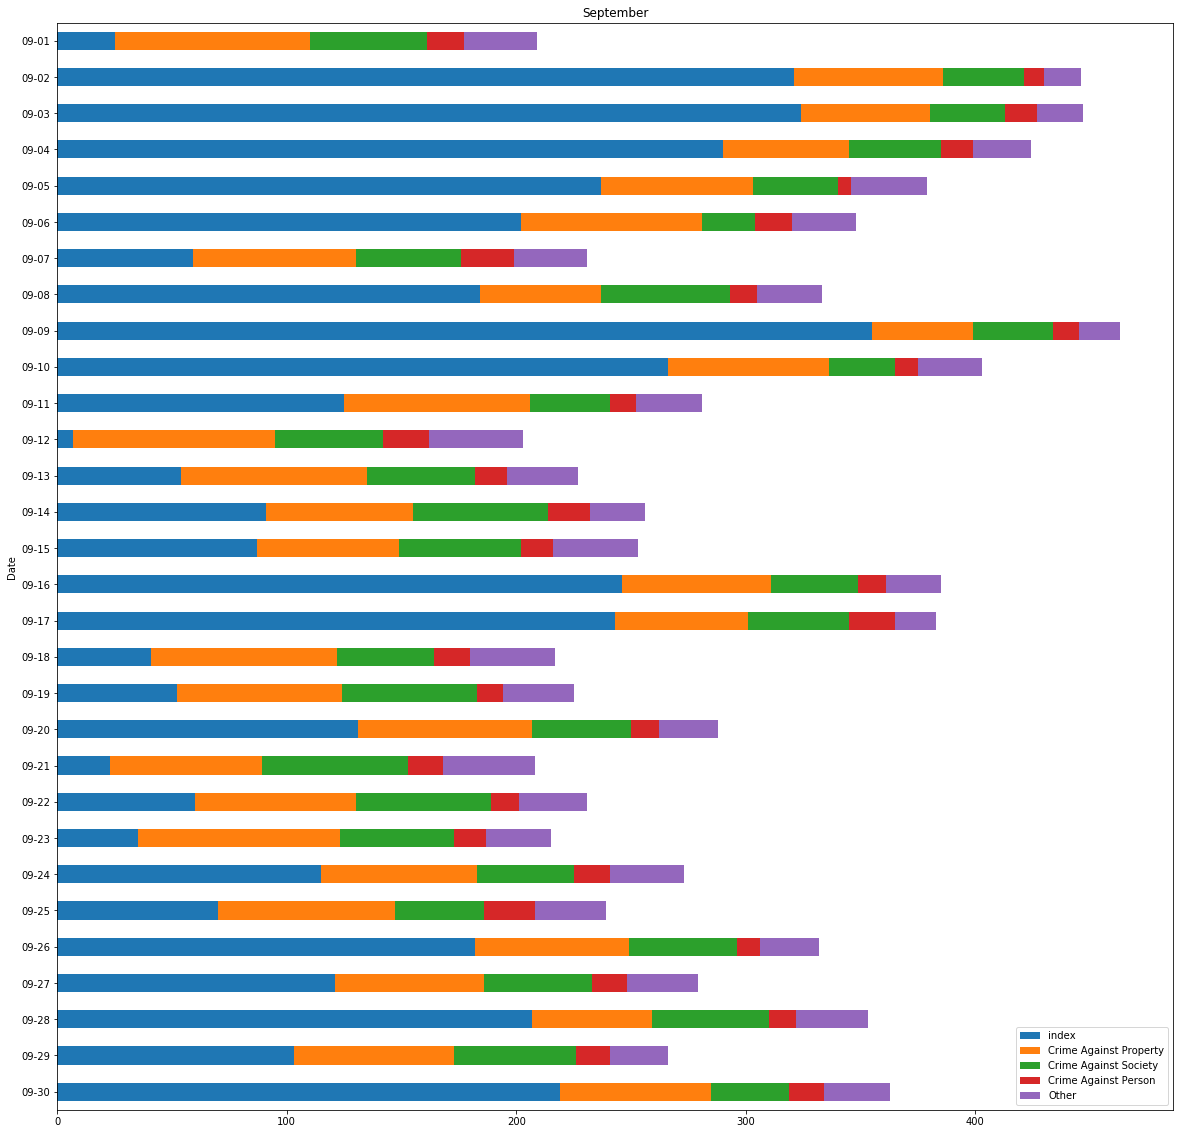

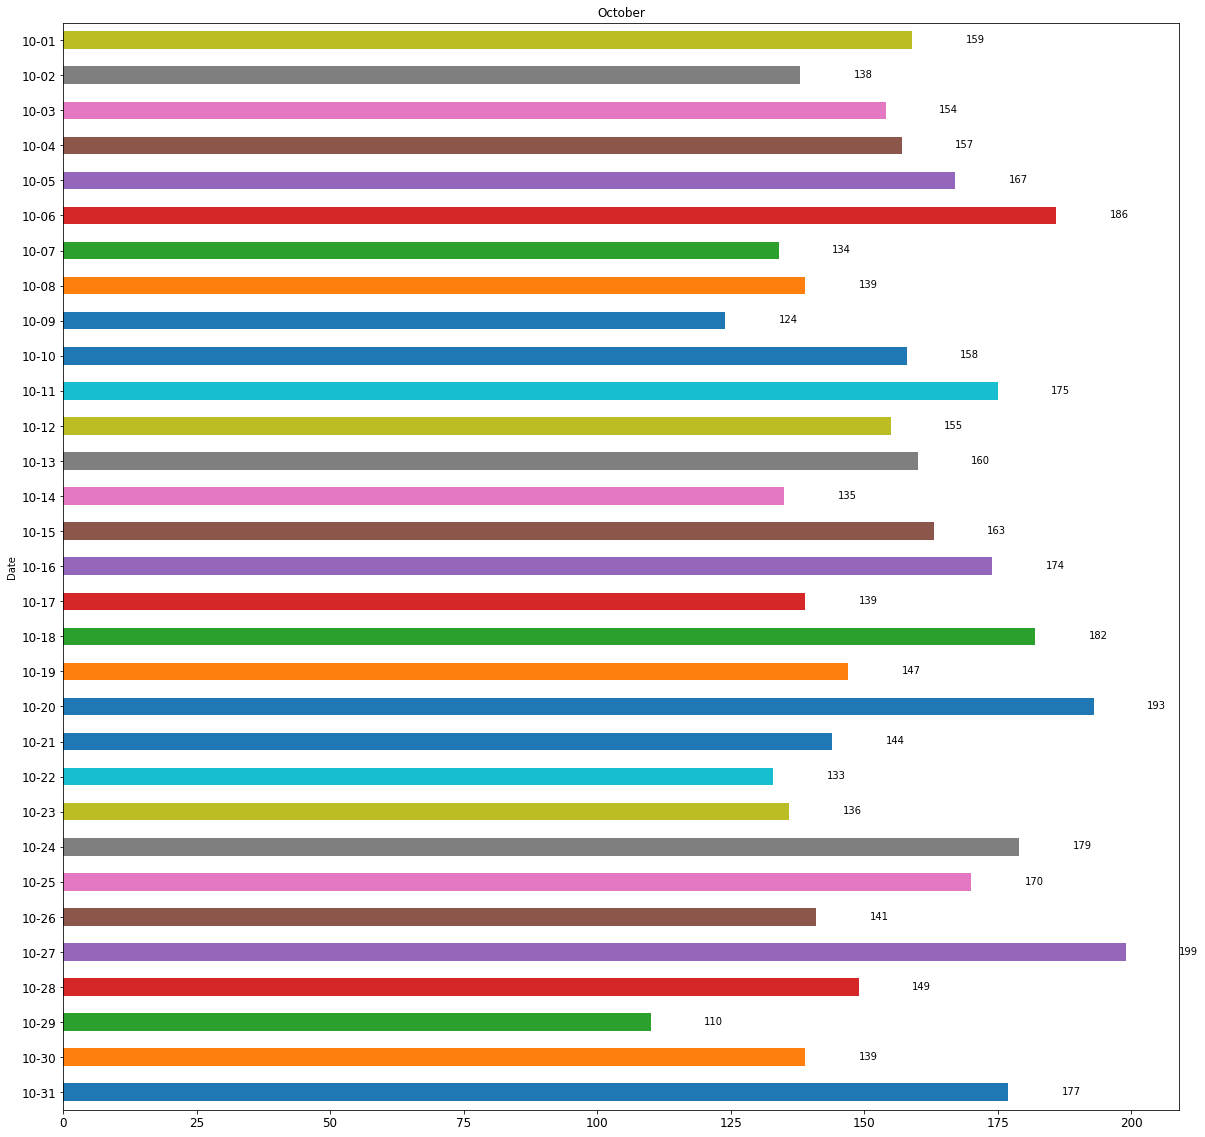

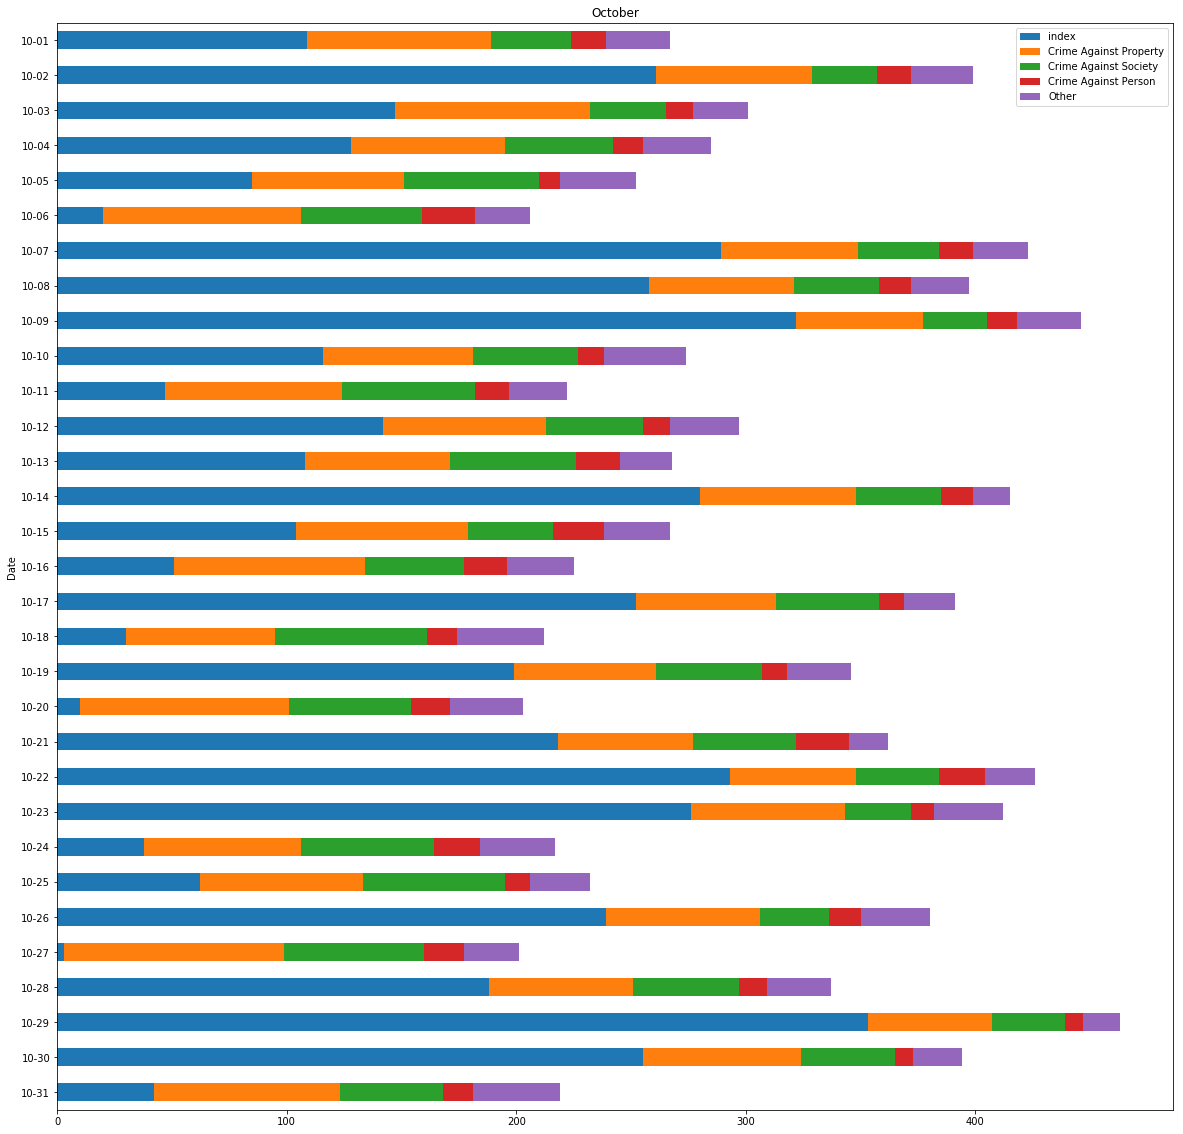

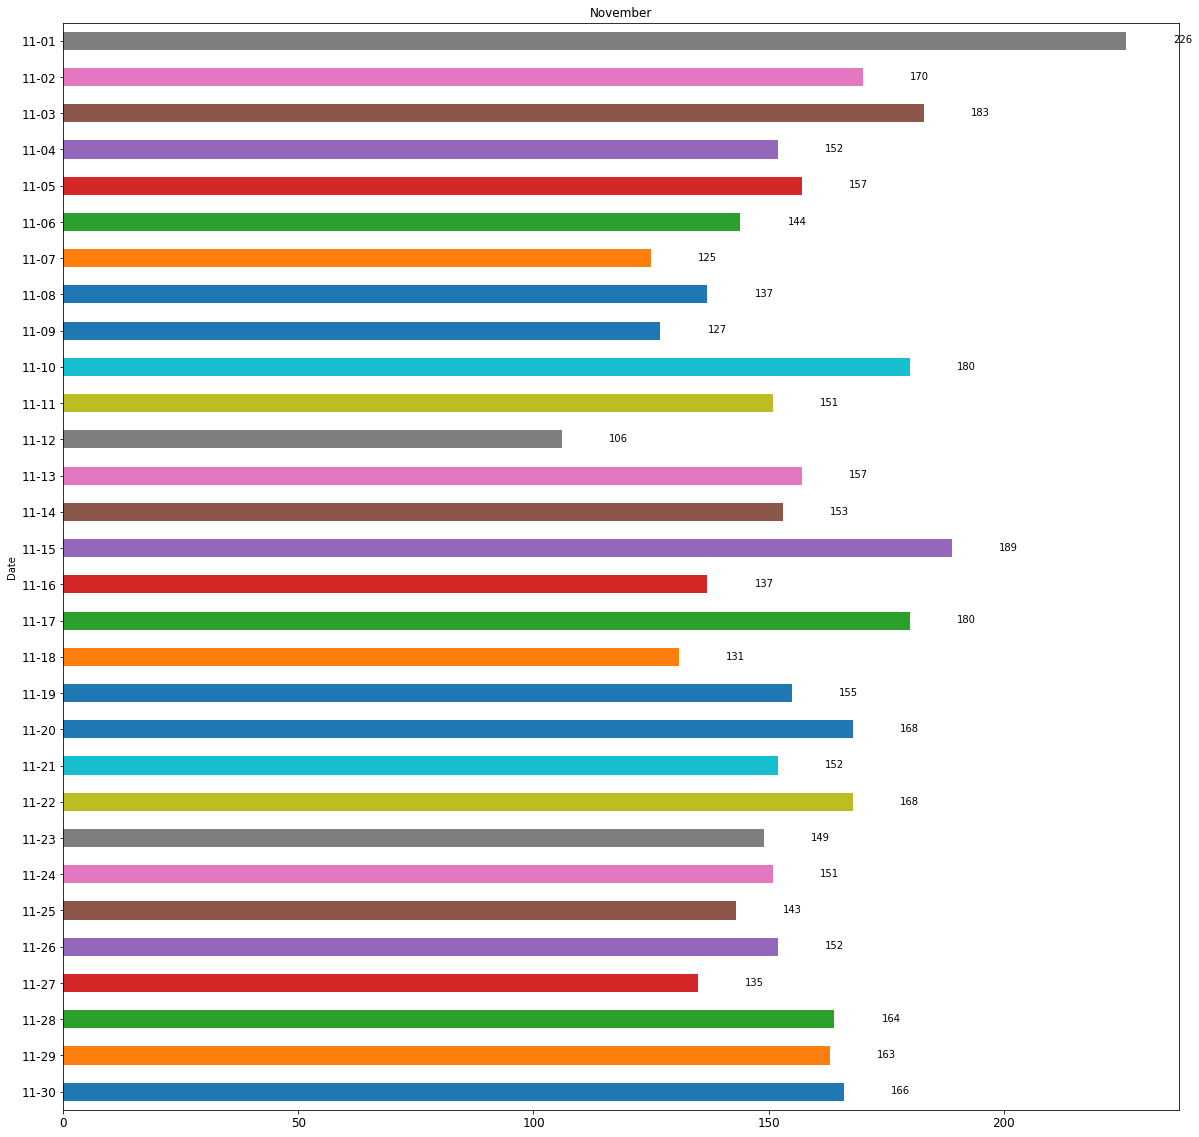

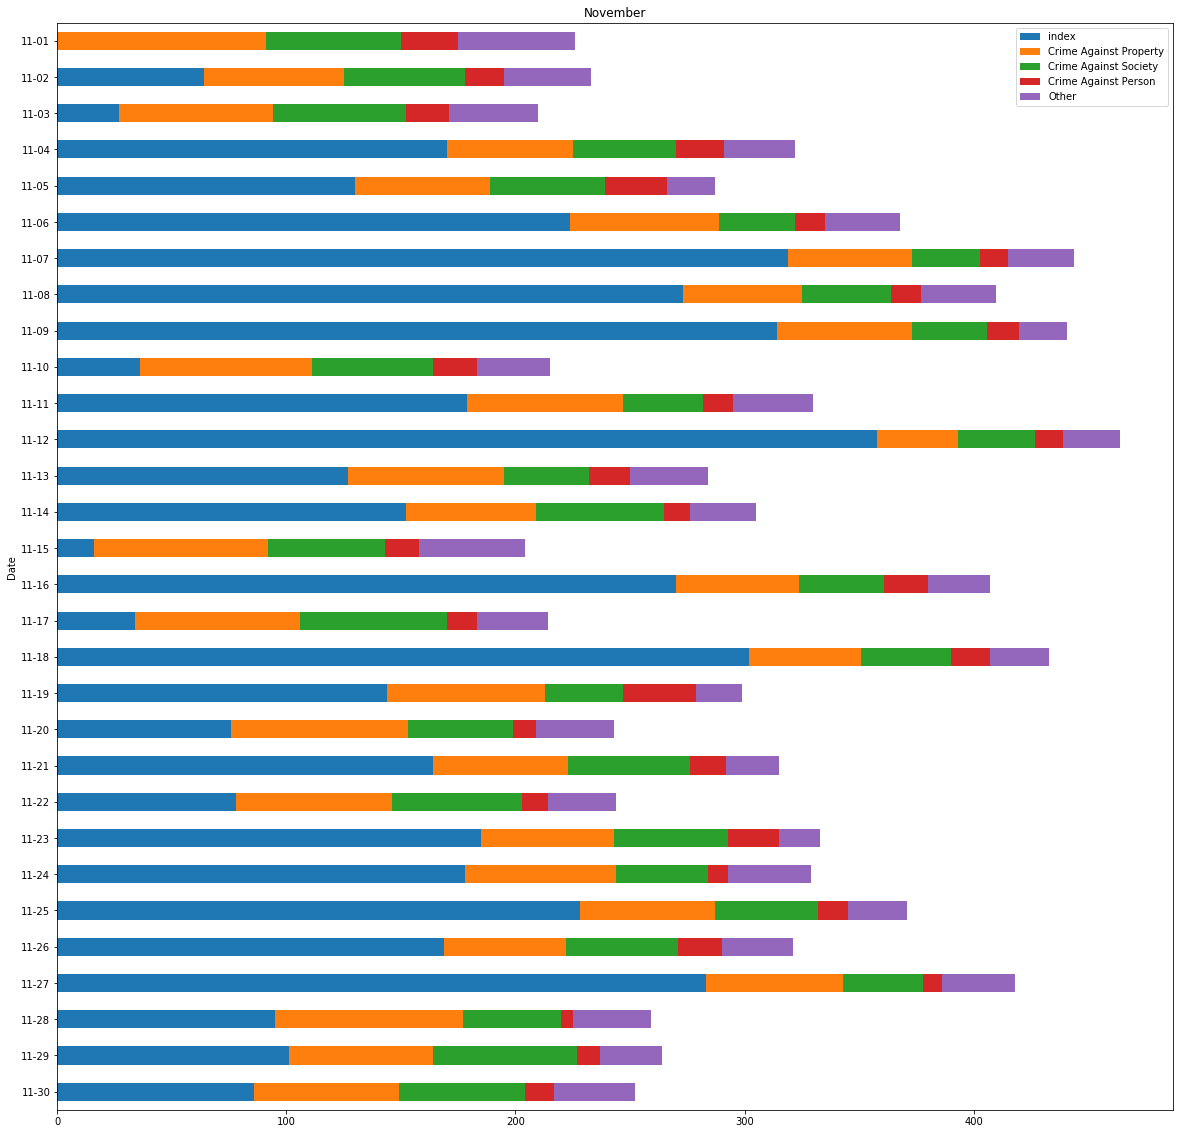

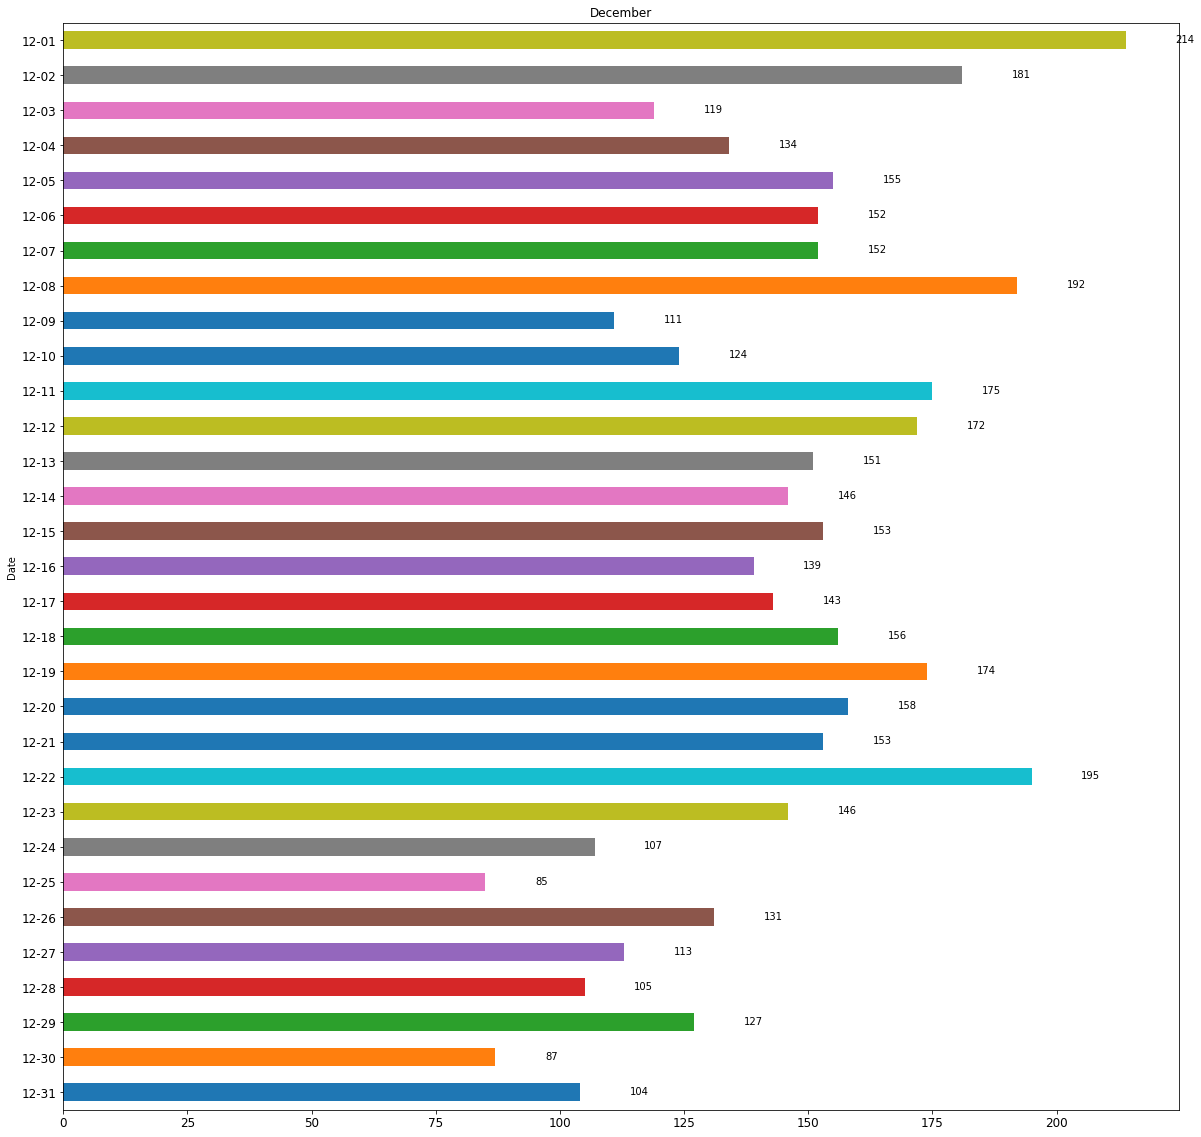

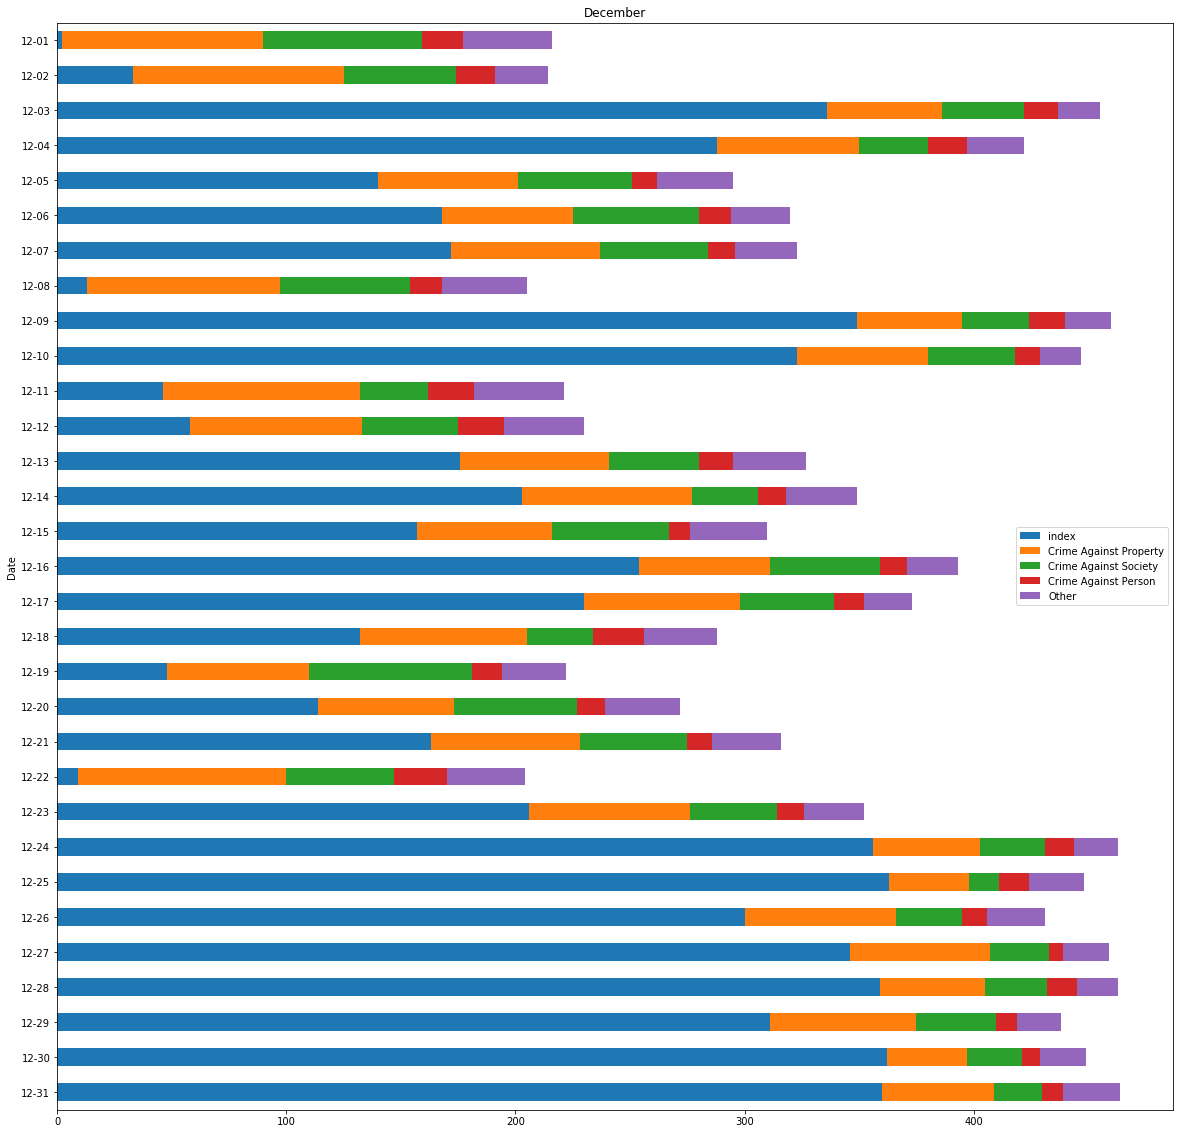

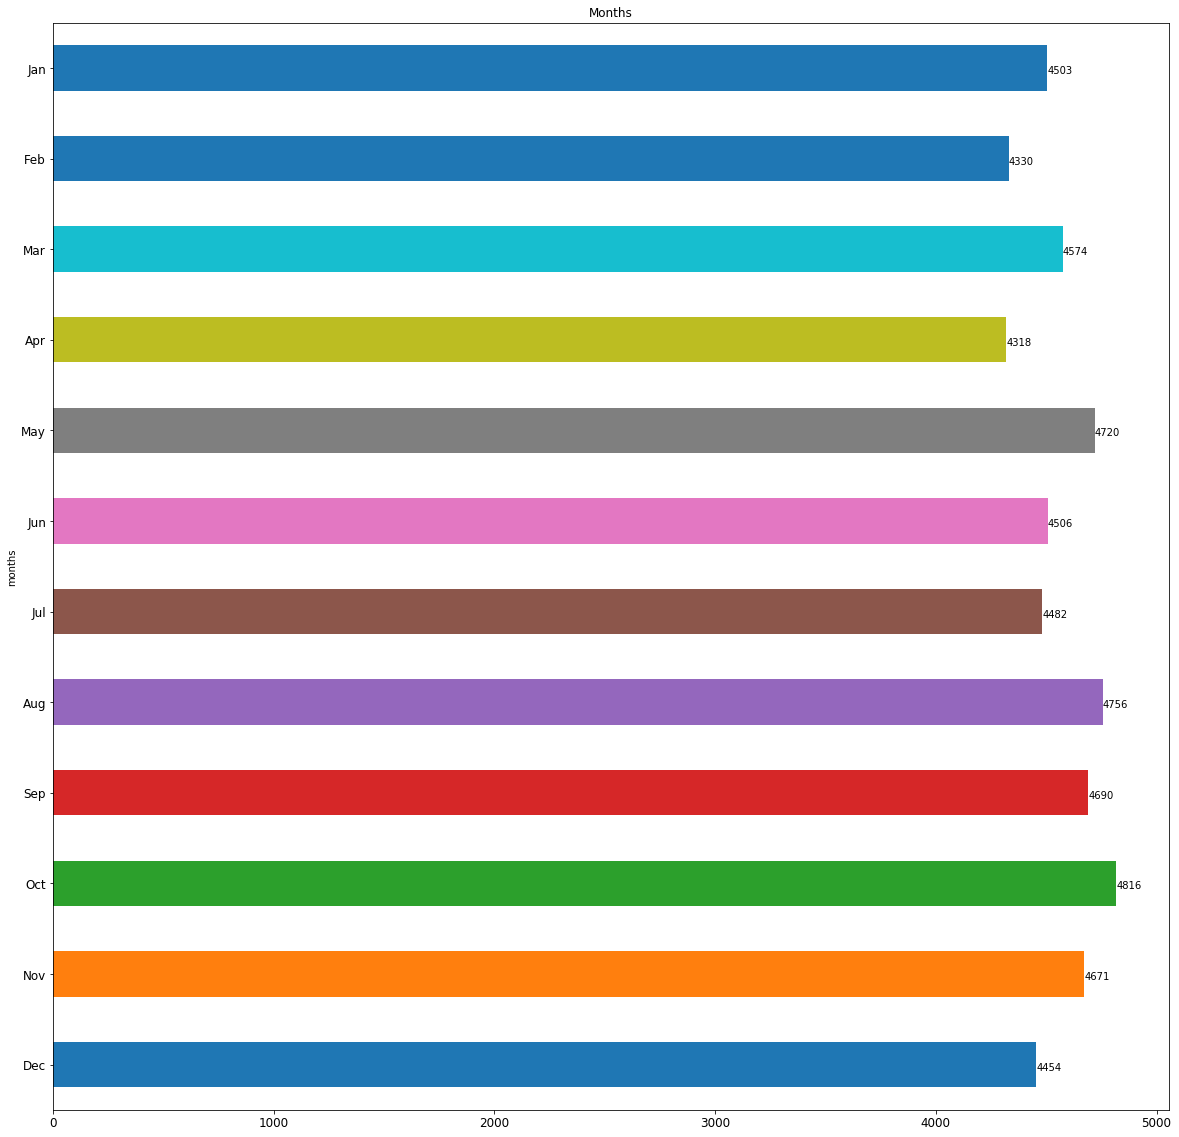

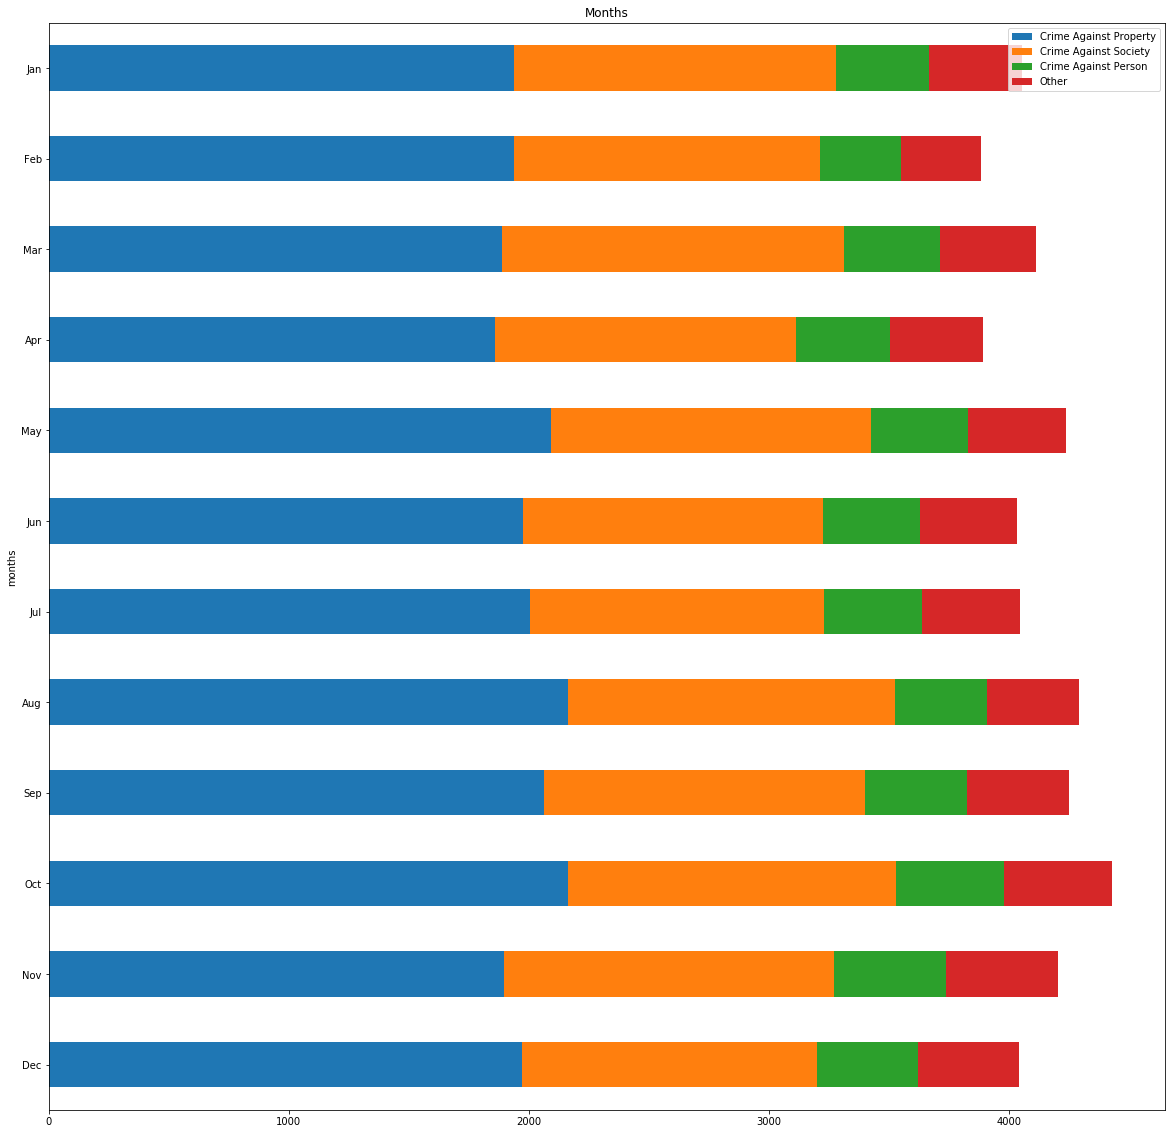

In [15]:
monthandcount(jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec)

# Crime by hour

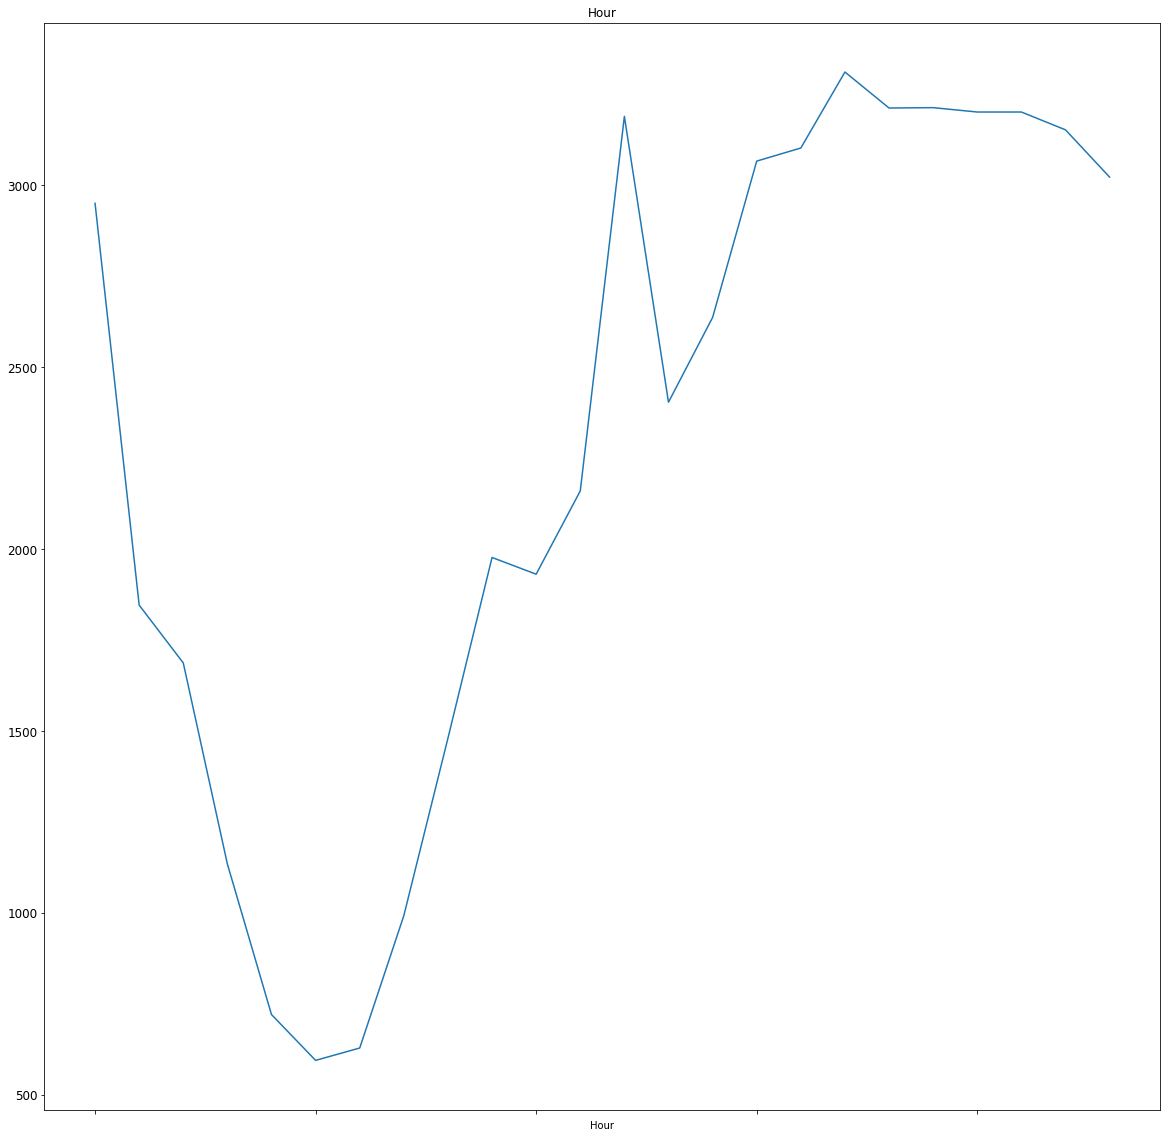

In [16]:
hourvalues = list(map(str, data['Start Time'].value_counts().keys().tolist()))
hourcounts = list(map(int, data['Start Time'].value_counts().tolist()))
ughh = []
ughhh = []
hour = pd.DataFrame({'Hour':hourvalues,'Crime Frequency':hourcounts})
hourbar = hour.sort_values(['Hour'])
#hourbar = hourbar.drop([24],axis = 0)
ax = hourbar.plot(x = 'Hour', y = 'Crime Frequency', kind = 'line', figsize = (20,20),title = 'Hour', legend = False, fontsize = 12)

In [5]:
temp = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
#temp = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
date["Temperature"] = temp["AVG"]

In [6]:
print(date.head())

     index   Date month day  Crime Against Property  Crime Against Society  \
364    360  12-31    12  31                      49                     21   
363    362  12-30    12  30                      35                     24   
362    313  12-29    12  29                      64                     35   
361    359  12-28    12  28                      46                     27   
360    348  12-27    12  27                      61                     26   

     Crime Against Person  Other  Crime Frequency  Temperature  
364                     9     25              104         24.5  
363                     8     20               87         22.0  
362                     9     19              127         17.5  
361                    13     18              105         21.0  
360                     6     20              113         31.5  


In [7]:
def tempandcrime(date1):
    date1 = date1.loc[::-1]
    date1["Day Number"] = [i+1 for i in range (0,365)]
    date1["avg_count"] = date1['Crime Frequency'].rolling(7).mean()
    date1["avg_temp"] = date1['Temperature'].rolling(7).mean()
    ax = date1.plot(x = 'Day Number', y = ['Crime Frequency','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['Temperature','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['Crime Frequency','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['Temperature','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    
    ax = date1.plot(title = "2017", x = 'Day Number', y = ['Crime Frequency','Temperature'], kind = 'line', figsize = (25,10), fontsize = 12,xticks = [1,31,59,90,120,151,181,212,243,273,304,334,365],grid = True)
    ax.set_xlabel("Day of the Year")
    fig = ax.get_figure()
    fig.savefig("2017.png")

# Temp and Crime

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

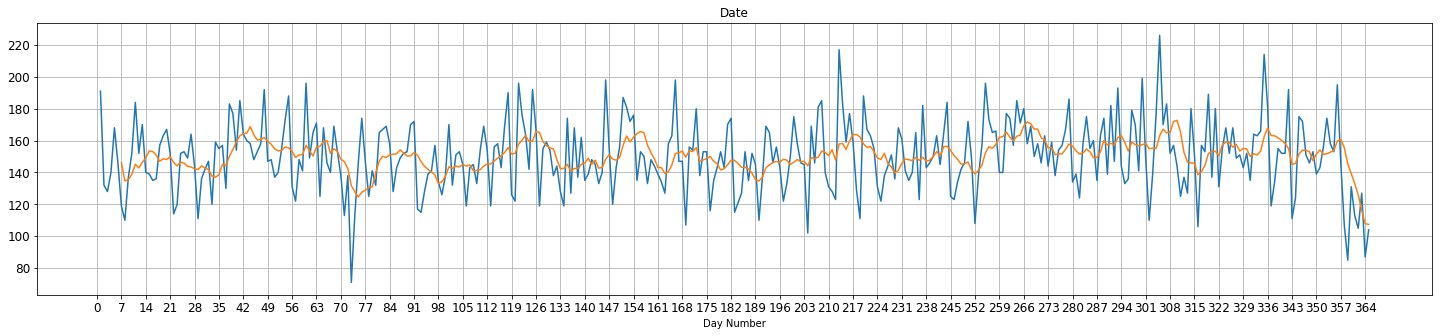

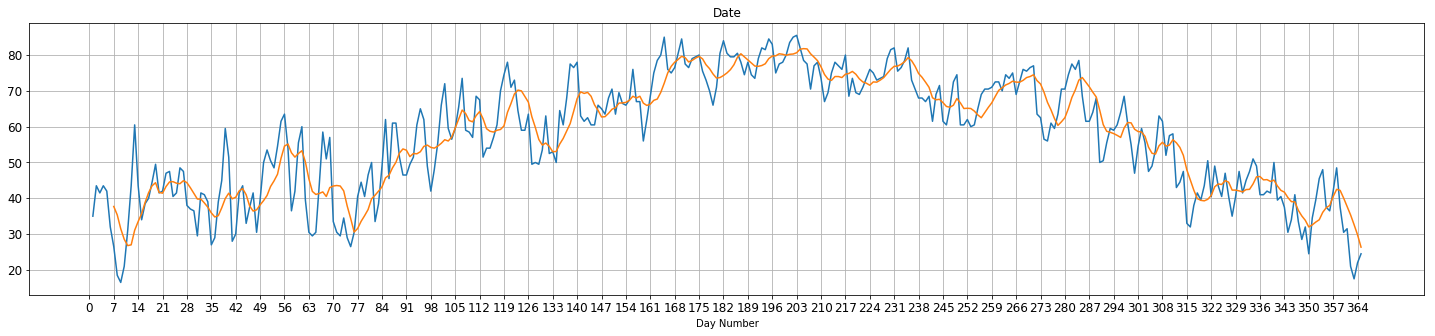

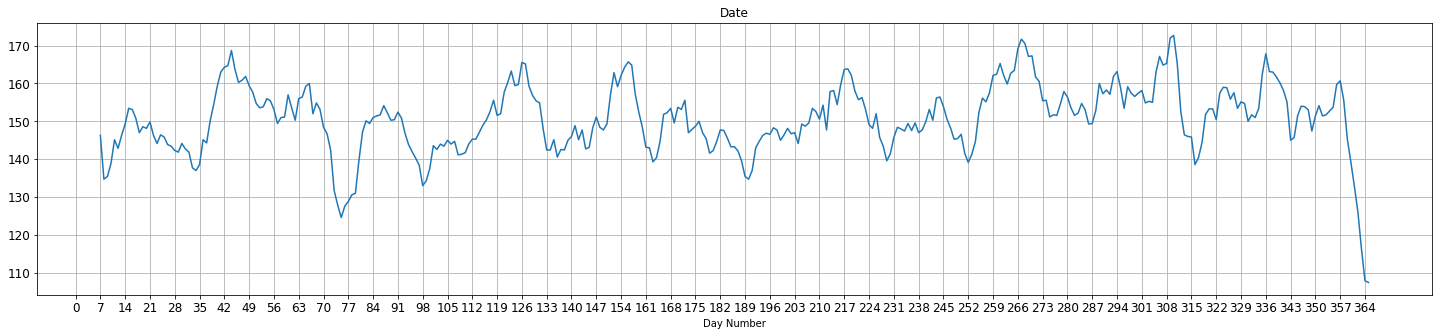

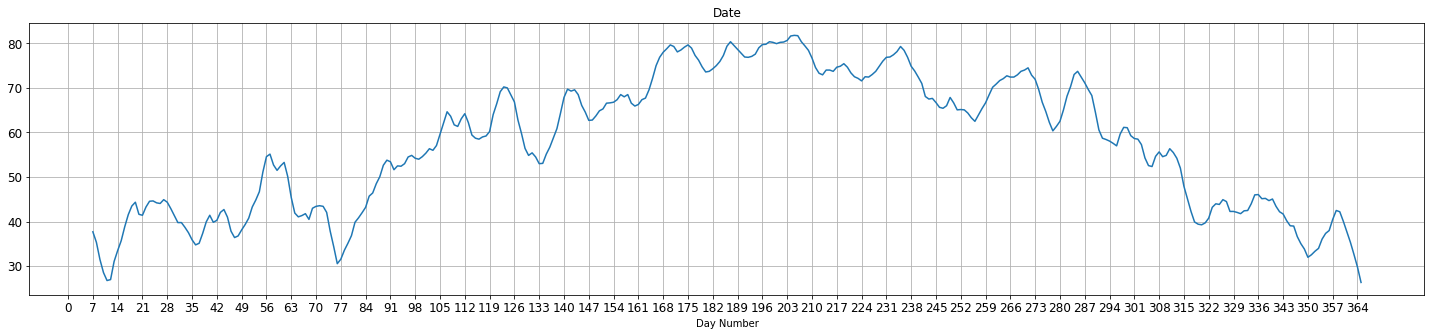

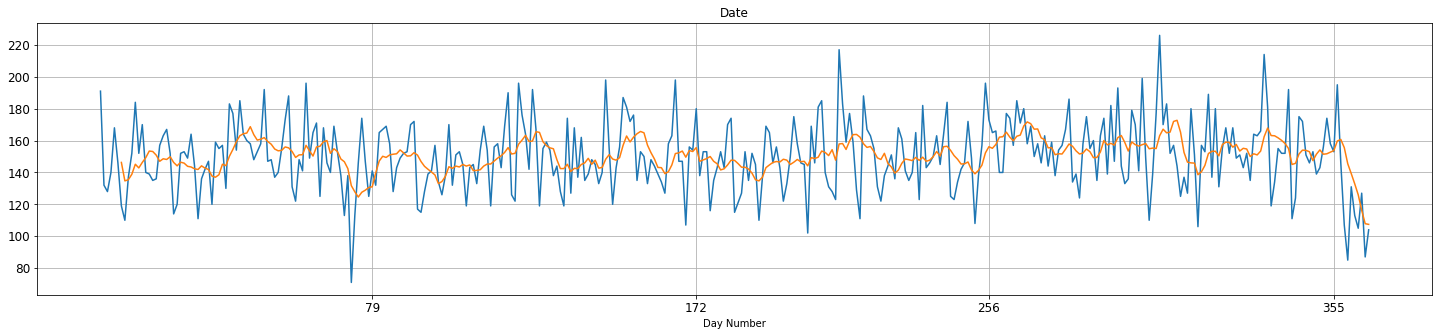

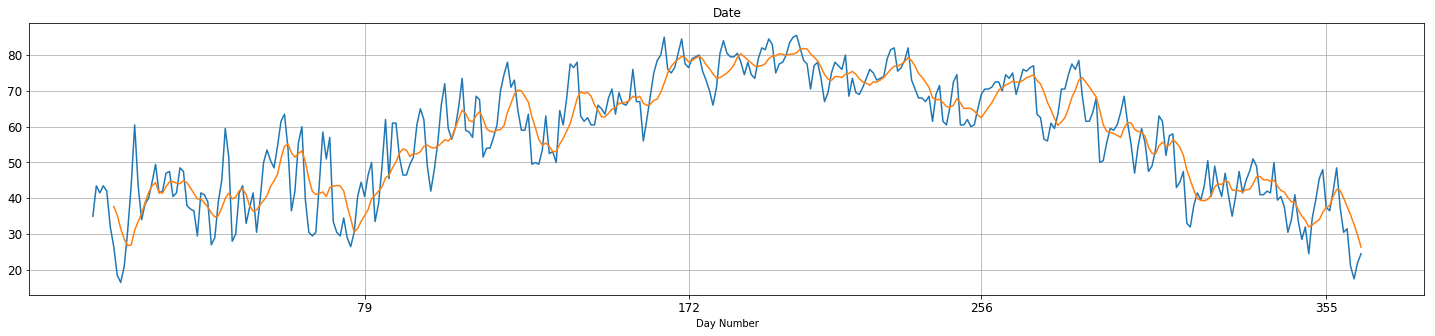

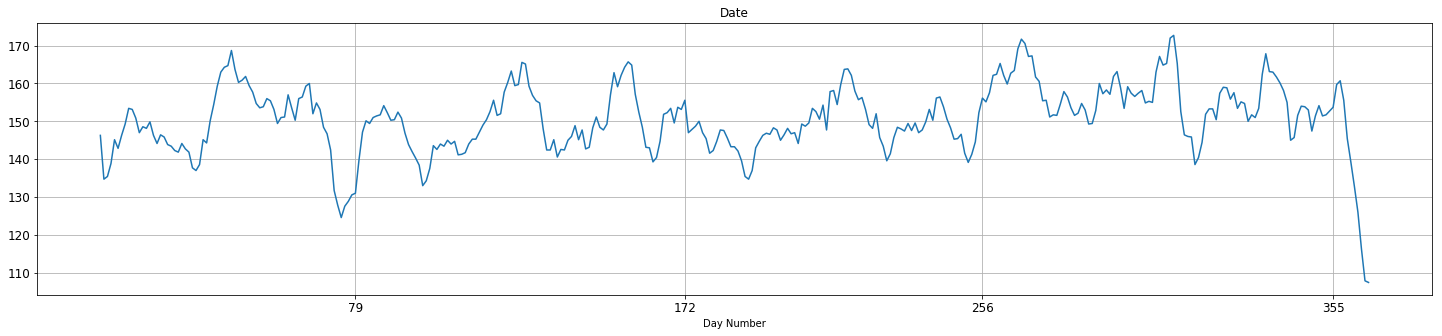

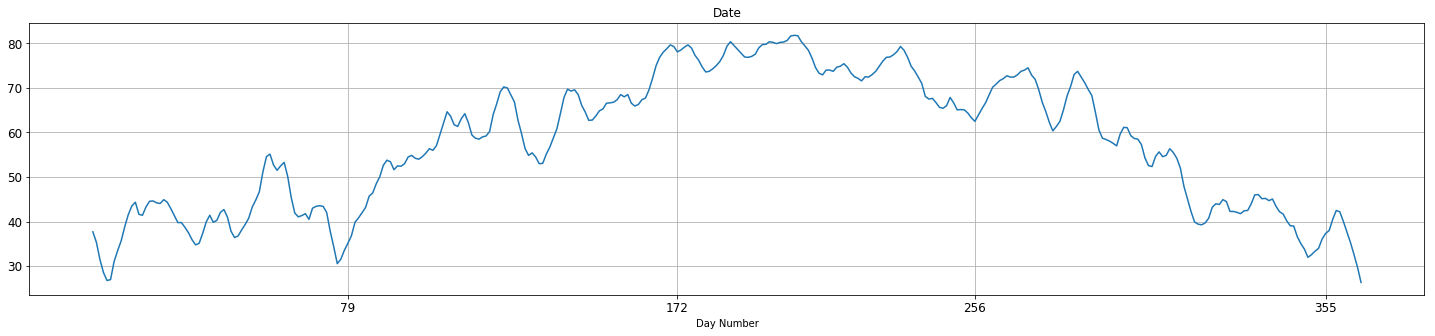

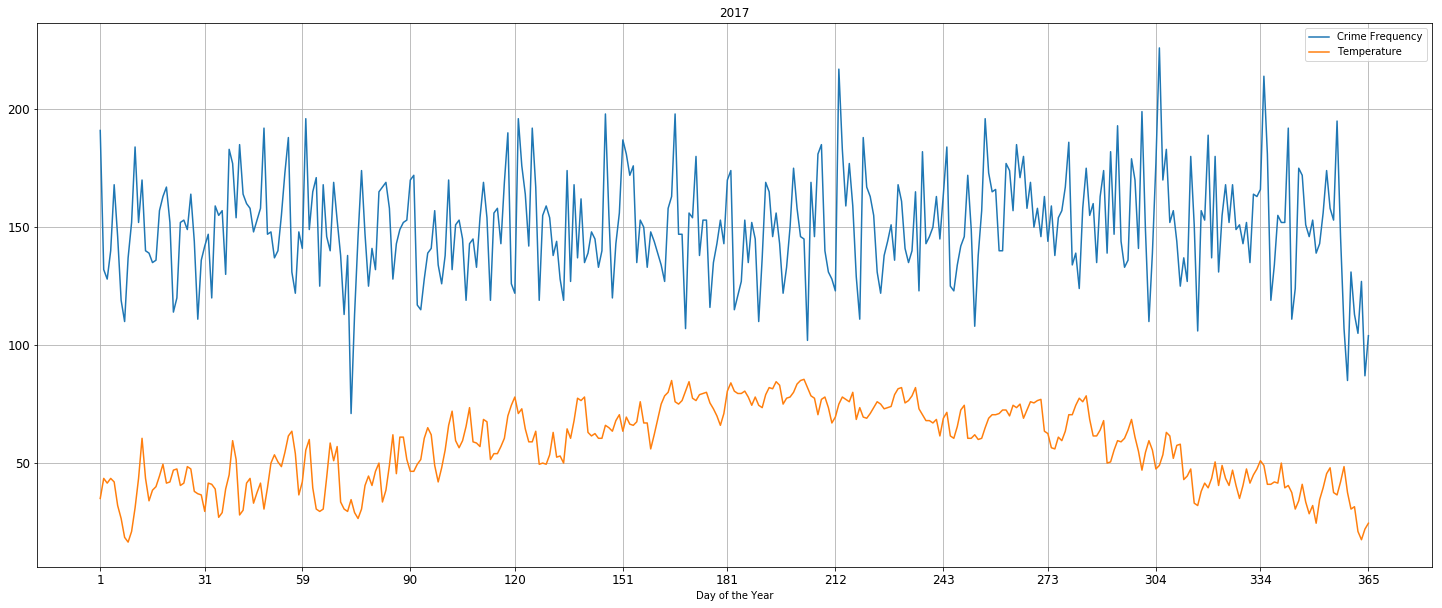

In [8]:
tempandcrime(date)

In [ ]:
def tempandcrime(date1):
    date1["Day Number"] = [i+1 for i in range (0,365)]
    date1["avg_count"] = date1['count'].rolling(7).mean()
    date1["avg_temp"] = date1['Temp'].rolling(7).mean()
    ax = date1.plot(x = 'Day Number', y = ['count','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['Temp','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [i for i in range(0,365,7)],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['count','avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['Temp','avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)

    ax = date1.plot(x = 'Day Number', y = ['avg_count' ], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)
    ax = date1.plot(x = 'Day Number', y = ['avg_temp'], kind = 'line', figsize = (25,5),title = "Date", legend = False, fontsize = 12,xticks = [79,172,256,355],grid = True)

In [23]:
def countt(data):
    ugh = [0 for i in range(0,365)]
    for index,row in data.iterrows():
        ugh[datevalues.index(row["Start Date"])] += 1
    return ugh

In [24]:
h0 = data.loc[data["Start Time"] == '00']
h1 = data.loc[data["Start Time"] == '01']
h2 = data.loc[data["Start Time"] == '02']
h3 = data.loc[data["Start Time"] == '03']
h4 = data.loc[data["Start Time"] == '04']
h5 = data.loc[data["Start Time"] == '05']
h6 = data.loc[data["Start Time"] == '06']
h7 = data.loc[data["Start Time"] == '07']
h8 = data.loc[data["Start Time"] == '08']
h9 = data.loc[data["Start Time"] == '09']
h10 = data.loc[data["Start Time"] == '10']
h11 = data.loc[data["Start Time"] == '11']
h12 = data.loc[data["Start Time"] == '12']
h13 = data.loc[data["Start Time"] == '13']
h14 = data.loc[data["Start Time"] == '14']
h15 = data.loc[data["Start Time"] == '15']
h16 = data.loc[data["Start Time"] == '16']
h17 = data.loc[data["Start Time"] == '17']
h18 = data.loc[data["Start Time"] == '18']
h19 = data.loc[data["Start Time"] == '19']
h20 = data.loc[data["Start Time"] == '20']
h21 = data.loc[data["Start Time"] == '21']
h22 = data.loc[data["Start Time"] == '22']
h23 = data.loc[data["Start Time"] == '23']

hour = pd.DataFrame({'Hour':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]})
#hour = pd.DataFrame({'00':h0,'01':h1,'02':h2,'04':h4,'06':h6,'08':h8,'10':h10,'12':h12,'14':h14,'16':h16,'18':h18,'20':h20,'03':h3,'05':h5,'07':h7,'09':h9,'11':h11,'13':h13,'15':h15,'17':h17,'19':h19,'21':h21,'22':h22,'23':h23})
#hourbar = hour.sort_values(['Hour'])
#hourbar = hour.drop([24],axis = 0)
#ax = hour.plot(x = 'Hour', kind = 'line', figsize = (20,20),title = '2017 - Hourly Overlap', fontsize = 12, xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ugh = []
ughh = []
ughhh = []
ugh.append(np.mean(countt(h0)))
ugh.append(np.mean(countt(h1)))
ugh.append(np.mean(countt(h2)))
ugh.append(np.mean(countt(h3)))
ugh.append(np.mean(countt(h4)))
ugh.append(np.mean(countt(h5)))
ugh.append(np.mean(countt(h6)))
ugh.append(np.mean(countt(h7)))
ugh.append(np.mean(countt(h8)))
ugh.append(np.mean(countt(h9)))
ugh.append(np.mean(countt(h10)))
ugh.append(np.mean(countt(h11)))
ugh.append(np.mean(countt(h12)))
ugh.append(np.mean(countt(h13)))
ugh.append(np.mean(countt(h14)))
ugh.append(np.mean(countt(h15)))
ugh.append(np.mean(countt(h16)))
ugh.append(np.mean(countt(h17)))
ugh.append(np.mean(countt(h18)))
ugh.append(np.mean(countt(h19)))
ugh.append(np.mean(countt(h20)))
ugh.append(np.mean(countt(h21)))
ugh.append(np.mean(countt(h22)))
ugh.append(np.mean(countt(h23)))
hour["AVG"] = ugh
ugh = []
ugh.append(np.std(countt(h0)))
ugh.append(np.std(countt(h1)))
ugh.append(np.std(countt(h2)))
ugh.append(np.std(countt(h3)))
ugh.append(np.std(countt(h4)))
ugh.append(np.std(countt(h5)))
ugh.append(np.std(countt(h6)))
ugh.append(np.std(countt(h7)))
ugh.append(np.std(countt(h8)))
ugh.append(np.std(countt(h9)))
ugh.append(np.std(countt(h10)))
ugh.append(np.std(countt(h11)))
ugh.append(np.std(countt(h12)))
ugh.append(np.std(countt(h13)))
ugh.append(np.std(countt(h14)))
ugh.append(np.std(countt(h15)))
ugh.append(np.std(countt(h16)))
ugh.append(np.std(countt(h17)))
ugh.append(np.std(countt(h18)))
ugh.append(np.std(countt(h19)))
ugh.append(np.std(countt(h20)))
ugh.append(np.std(countt(h21)))
ugh.append(np.std(countt(h22)))
ugh.append(np.std(countt(h23)))
hour["STD"] = ugh
ax = hour.plot(x = 'Hour', kind = 'line', figsize = (10,10), y = "AVG", yerr = "STD",xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

NameError: name 'datevalues' is not defined